# Business Case:

A US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.


Also, determine the optimal value of lambda for ridge and lasso regression.

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   #Visualization library
import seaborn as sns             #Visualization library
import warnings                   #remove warnings
warnings.filterwarnings('ignore') 

#Libraries for model building, evaluation and feature selection.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

#Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading data
data = pd.read_csv("train.csv")

# **1. Understanding the data**

**Feel of the data**

In [3]:
#Head of the data
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#Shape of the data
data.shape

(1460, 81)

In [5]:
#Analyze statistical spread of the data
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# % of null values in the dataset in each column
(100*data.isnull().sum()/len(data)).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageCond        5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageFinish      5.547945
GarageQual        5.547945
BsmtExposure      2.602740
BsmtFinType2      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
Utilities         0.000000
YearRemodAdd      0.000000
MSSubClass        0.000000
Foundation        0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
Exterior1st       0.000000
RoofMatl          0.000000
RoofStyle         0.000000
YearBuilt         0.000000
LotConfig         0.000000
OverallCond       0.000000
OverallQual       0.000000
HouseStyle        0.000000
BldgType          0.000000
Condition2        0.000000
BsmtFinSF1        0.000000
M

# **2. Data Processing- DataCleaning, Data Analysis: Univariate and Bivariate Analysis and Data Preparation**

## **2.1 Checking values in columns with null values > 35%.**

In [8]:
#Column 1: PoolQC
data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

For the column PoolQC, value= NA means there's no pool which may or may not influence the house rates. But here in the spread of the data, NA constitutes 99.52% of the data which makes it an highly imbalanced spread. Hence, this column will be dropped. Same goes for MiscFeatures, Alley and Fence. But before dropping them let's check if there's any relation with the target variables, when the values for all these columns is NA.

In [9]:
data[(data['PoolQC'].notnull()) & (data['MiscFeature'].notnull()) & (data['Alley'].notnull()) & (data['Fence'].notnull())]['SalePrice']

Series([], Name: SalePrice, dtype: int64)

All these 3 variables have never been not null at the same time. Dropping these 4 columns from the dataset.

In [10]:
data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)
data.shape

(1460, 77)

The most null values now are present in FireplaceQu. Analysizing the variable.

In [11]:
#Replacing the null value with NA in the column
data['FireplaceQu']=data['FireplaceQu'].replace(np.NAN, 'NA')

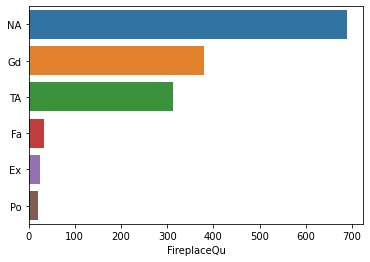

In [12]:
sns.barplot(x=data.FireplaceQu.value_counts(), y=data.FireplaceQu.value_counts().index)
plt.show()

The number of houses with no fireplaces is way more than that any other kind of fireplaces. Comparing the prices of the houses w.r.t FireplaceQU

In [13]:
data.SalePrice.dtype

dtype('int64')

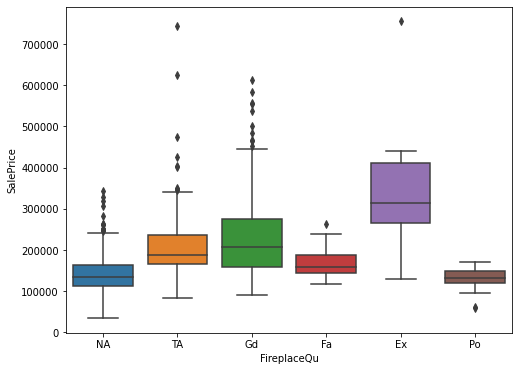

In [14]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data=data, x='FireplaceQu', y='SalePrice')

Since the price of the house varies according to the quality of the Fireplace, not dropping the variable.

Now in the dataset, the most missing values are present in the variable LotFrontage.

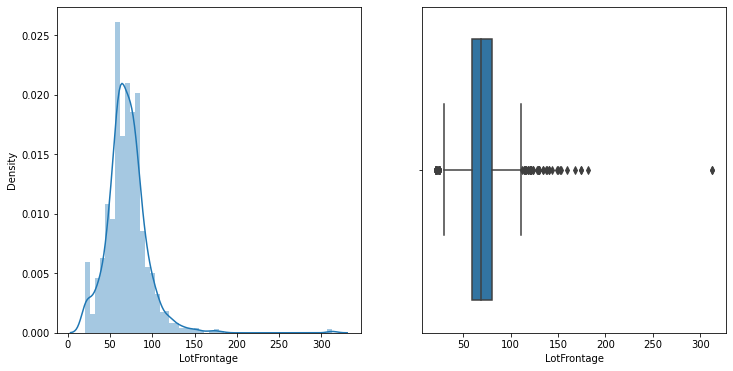

In [15]:
#Checking the spread of the data in the column LotFrontage.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(data.LotFrontage, kde=True)
plt.subplot(1,2,2)
sns.boxplot(data.LotFrontage)
plt.show()

In [16]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

Analyzing the spread of the data, the data shows a normal distribution with right skewed due to present of outliers. Also, seeing the describe data of the column, it shows that 75th percentile of the data is 80 where as maximum value is 313. There's definitely outliers in the data.

In [17]:
print(data.LotFrontage.mean())
print(data.LotFrontage.median())
print(data.LotFrontage.mode())

70.04995836802665
69.0
0    60.0
dtype: float64


Looking at the spread of the column data and the extent of outliers, imputing the missing values with median won't change the spread of the data.

In [18]:
data.LotFrontage.fillna(data.LotFrontage.median(), inplace=True)

In [19]:
data.LotFrontage.isnull().sum()

0

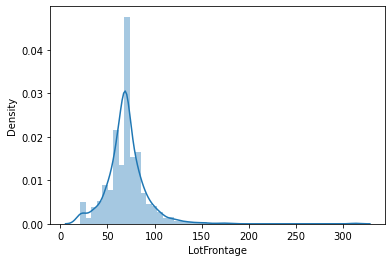

In [20]:
sns.distplot(data.LotFrontage, kde=True)
plt.show()

Since data in column GarageYrBlt is in year, we can extract more information out of the data if we can calculate the age of the garage from the year it was built to current year.

In [21]:
import datetime
current_year = int(datetime.datetime.now().year)

In [22]:
#Age of the garage in the same column
data.GarageYrBlt = current_year-data.GarageYrBlt

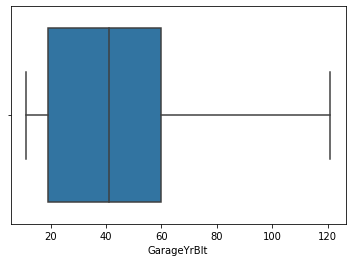

In [23]:
 #Checking outliers
sns.boxplot('GarageYrBlt', data = data)
plt.show()

Number of null values:  81


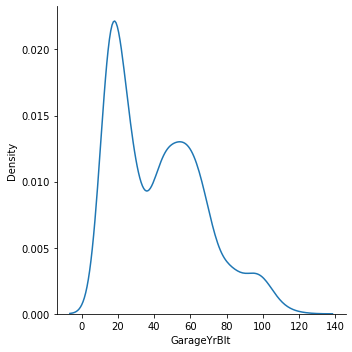

In [24]:
print('Number of null values: ', data.GarageYrBlt.isnull().sum())
sns.displot(data.GarageYrBlt, kind='kde')
plt.show()

In [25]:
print(data.GarageYrBlt.mean())
print(data.GarageYrBlt.median())
print(data.GarageYrBlt.mode())

42.493836113125454
41.0
0    16.0
dtype: float64


Number of null values:  0


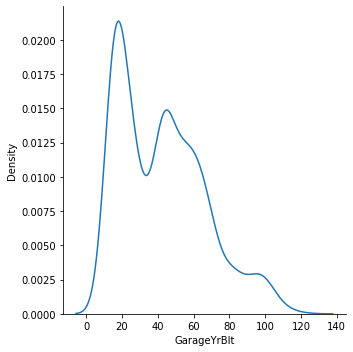

In [26]:
''' Since only 81 rows have null values, and the distribution of the data isn't standard gaussian distribution imputing the missing values
using mean.'''
data.GarageYrBlt.fillna(data.GarageYrBlt.mean(), inplace=True)
print('Number of null values: ', data.GarageYrBlt.isnull().sum())
sns.displot(data.GarageYrBlt, kind='kde')
plt.show()

Similarly calculating the number of years(the age) for all the columns when the house was sold, when the house was built or remodelled.

In [27]:
#Caluculating the number of years the house was sold, build and remodelled from the current year
data.YrSold = current_year-data.YrSold
data.YearBuilt = current_year-data.YearBuilt
data.YearRemodAdd = current_year-data.YearRemodAdd

In [28]:
#Adding a new column Remodelled to indicate if the house is remodelled or not. If it's remodelled Remodelled=1 else 0
data['Remodelled']=np.where(data.YearBuilt == data.YearRemodAdd, 1, 0)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5         18            18     Gable   
1     1Story            6            8         45            45     Gable   
2     2Story            7            5         20            19     Gable   
3     2Story            7            5        106            51     Gable   
4     2Story            8            5         21            21     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0          NA     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [29]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [30]:
#Adjusting the new column besides YearRemodAdd
cols=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
      'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
      'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
      'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Remodelled', 'RoofStyle',
      'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
      'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
      'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
      'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
      'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
      'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
      'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
      'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
      'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType','SaleCondition', 'SalePrice']
data=data[cols]
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  Remodelled  \
0     2Story            7            5         18            18           1   
1     1Story            6            8         45            45           1   
2     2Story            7            5         20            19           0   
3     2Story            7            5        106            51           0   
4     2Story            8            5         21            21           1   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   
3     Gable  CompShg     Wd Sdng     Wd Shng       None         0.0        TA   
4     Gable  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd   

  ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        TA      PConc       Gd       TA           No          GLQ   
1        TA     CBlock       Gd       TA           Gd          ALQ   
2        TA      PConc       Gd       TA           Mn          GLQ   
3        TA     BrkTil       TA       Gd           No          ALQ   
4        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
0         706          Unf           0        150          856    GasA   
1         978          Unf           0        284         1262    GasA   
2         486          Unf           0        434          920    GasA   
3         216          Unf           0        540          756    GasA   
4         655          Unf           0        490         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0          NA   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3  

1    0.523288
0    0.476712
Name: Remodelled, dtype: float64


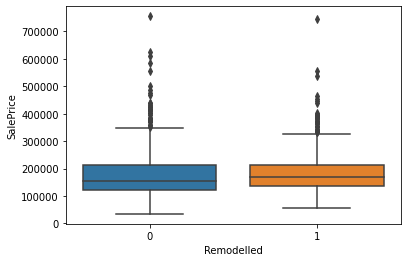

In [31]:
#Distribution of Remodelled variable.
print(data.Remodelled.value_counts()/len(data))

#Analyzing relationship between Remodelled variable and SalePrice variable.
sns.boxplot(data=data, x='Remodelled', y='SalePrice')
plt.show()

52% of houses are remodelled where as 47% of the houses aren't. The Saleprice doesn't gets affected much solely with the variable Remodelled.

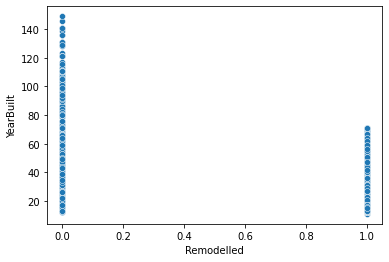

In [32]:
#Analyzing relationship between YearBuilt(age of the house) and Remodelled variable.
sns.scatterplot(data=data, x='Remodelled', y='YearBuilt')
plt.show()

All the houses with built year more than 80 years have been remodelled or renovated.

In [33]:
#Analyze values in GarageType, GarageFinish, GarageQual variable
print('GarageType\n', data.GarageType.value_counts())
print('GarageFinish\n', data.GarageFinish.value_counts())
print('GarageCond\n', data.GarageCond.value_counts())
print('GarageQual\n', data.GarageQual.value_counts())

GarageType
 Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageFinish
 Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
GarageCond
 TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
GarageQual
 TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


In [34]:
#5.5% of values in GarageType, GarageFinish, GarageCond and GarageQual variable has null values. Replacing null values NaN with NA as in no Garage
data.GarageType = data.GarageType.replace(np.nan, 'NA')
data.GarageFinish = data.GarageFinish.replace(np.nan, 'NA')
data.GarageCond = data.GarageCond.replace(np.nan, 'NA')
data.GarageQual = data.GarageQual.replace(np.nan, 'NA')

In [35]:
#Analyze values in GarageType, GarageFinish, GarageQual variable
print('GarageType\n', data.GarageType.value_counts())
print('GarageFinish\n', data.GarageFinish.value_counts())
print('GarageCond\n', data.GarageCond.value_counts())
print('GarageQual\n', data.GarageQual.value_counts())

GarageType
 Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
GarageFinish
 Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64
GarageCond
 TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
GarageQual
 TA    1311
NA      81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64


All the columns describing Garage had 81 null values in the same rows.

Analyzing Basment variables with null values. Variables like BsmtExposure, BsmtFinType1, BsmtFinType2, BsmtCond, BsmtQual have null values % rangung from 2.6% to 2.5%

In [36]:
print('BsmtExposure\n', data.BsmtExposure.value_counts())
print('BsmtFinType1\n',data.BsmtFinType1.value_counts())
print('BsmtFinType2\n',data.BsmtFinType2.value_counts())
print('BsmtCond\n',data.BsmtCond.value_counts())
print('BsmtQual\n',data.BsmtQual.value_counts())

BsmtExposure
 No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType1
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
BsmtFinType2
 Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
BsmtCond
 TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
BsmtQual
 TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64


In [37]:
#Seeing the bifurcation of categories in these columns, replacing the null values with NA representing the property doesn't have a basement.
data.BsmtExposure=data.BsmtExposure.replace(np.nan, 'NA')
data.BsmtFinType1=data.BsmtFinType1.replace(np.nan, 'NA')
data.BsmtFinType2=data.BsmtFinType2.replace(np.nan, 'NA')
data.BsmtCond=data.BsmtCond.replace(np.nan, 'NA')
data.BsmtQual=data.BsmtQual.replace(np.nan, 'NA')

In [38]:
print('BsmtExposure\n', data.BsmtExposure.value_counts())
print('BsmtFinType1\n',data.BsmtFinType1.value_counts())
print('BsmtFinType2\n',data.BsmtFinType2.value_counts())
print('BsmtCond\n',data.BsmtCond.value_counts())
print('BsmtQual\n',data.BsmtQual.value_counts())

BsmtExposure
 No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
BsmtFinType1
 Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
BsmtFinType2
 Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
BsmtCond
 TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64
BsmtQual
 TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64


In [39]:
#Analyzing MasVnrType column
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

Since most of the values in the column Masonry Veneer type is None, replacing the 0.54% of null values with None(mode)

In [40]:
data.MasVnrType.replace(np.nan, data.MasVnrType.mode()[0], inplace=True)
data.MasVnrType.value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [41]:
#Analying the column Electrical
data.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Since most of the values in the field Electrical SBrkr: Standard Circuit breakers and romex, replacing the null values in the column with it.

In [42]:
data.Electrical.replace(np.nan, data.Electrical.mode()[0], inplace=True)
data.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Masonry Veneer area mean 103.68526170798899
Masonry Veneer area median 0.0
Masonry Veneer area mode 0    0.0
dtype: float64


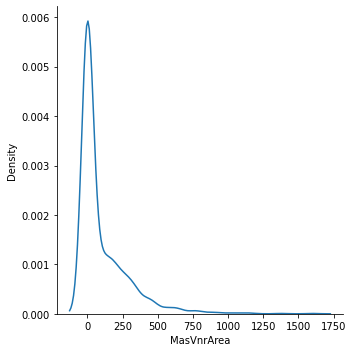

In [43]:
#Analyzing the column MasVnrArea 
print('Masonry Veneer area mean', data.MasVnrArea.mean())
print('Masonry Veneer area median', data.MasVnrArea.median())
print('Masonry Veneer area mode', data.MasVnrArea.mode())
sns.displot(data.MasVnrArea, kind='kde')
plt.show()

Since the distribution of MasVnrArea is highly right skewed, replacing null values with mean will hamper the distribution. Hence replacing null values with median.

In [44]:
data.MasVnrArea.replace(np.nan, data.MasVnrArea.median(), inplace=True)

In [45]:
#Checking if any more null values are present in the dataset
data.isnull().sum().sort_values(ascending=False)

SalePrice        0
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
Foundation       0
YearRemodAdd     0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
Remodelled       0
YearBuilt        0
SaleCondition    0
Utilities        0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
OverallCond      0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
OpenPorchSF      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
EnclosedPorch    0
HeatingQC        0
3SsnPorch        0
ScreenPorch 

All the null values are treated now.

In [46]:
data.shape

(1460, 78)

In [47]:
#The column MSSubClass, OverallQual, OverallCond is a categorical variable but it's mentioned as an integer. Changing the datatype
data.MSSubClass=data.MSSubClass.astype('object')
data.OverallQual=data.OverallQual.astype('object')
data.OverallCond=data.OverallCond.astype('object')

Removing all the categorical columns where one categorical value occupies for than 70% of the distribution.

In [48]:
#Segregating the categorical variables.
categorical_columns=data.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [49]:
#creating a list of categorical columns having more than 70% of one category.
drop_columns=[]
for i in categorical_columns:
  a=data[i].value_counts()/len(data)
  if len(a[a.values>0.70].values)>0:
    drop_columns.append(i)
drop_columns

['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [50]:
#dropping these columns from original dataset.
data.drop(drop_columns, axis=1, inplace=True)
data.shape

(1460, 55)

In [51]:
#defining new list of categorical columns.
new_categorical_columns=[i for i in categorical_columns if i not in drop_columns]
new_categorical_columns

['MSSubClass',
 'LotShape',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

## **2.2 Removing outliers from Numerical variables, Univariate, Bivariate and Multivariate Analysis**

In [52]:
#Segregating numerical columns
numerical_columns=data.select_dtypes(include=np.number).columns
numerical_columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'Remodelled', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

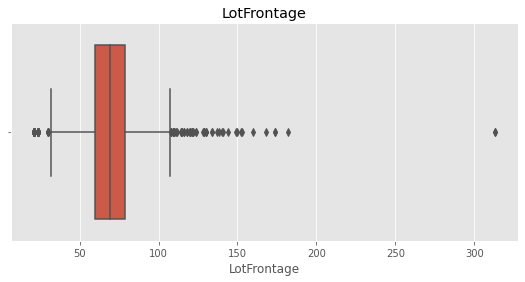

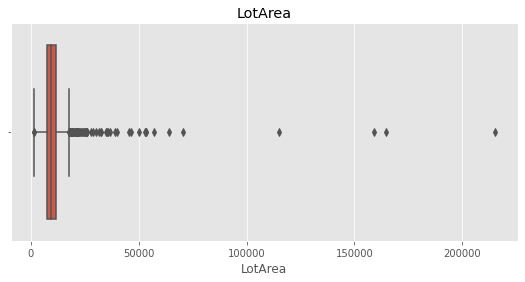

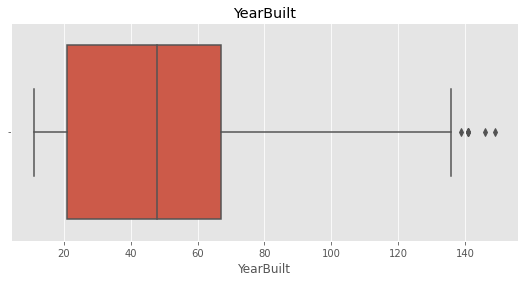

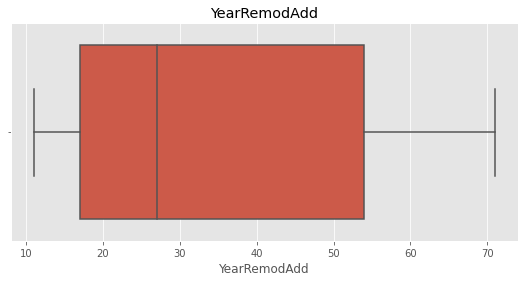

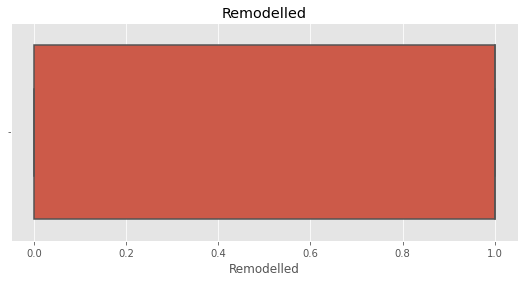

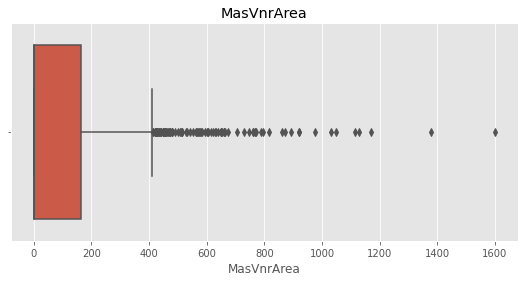

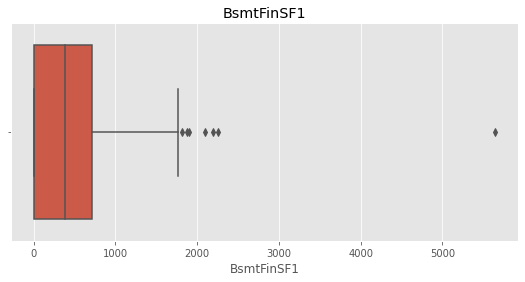

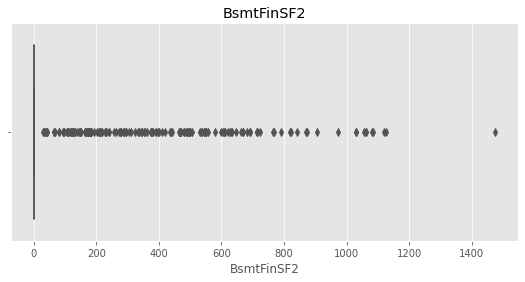

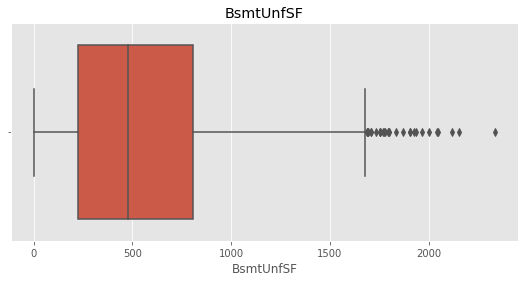

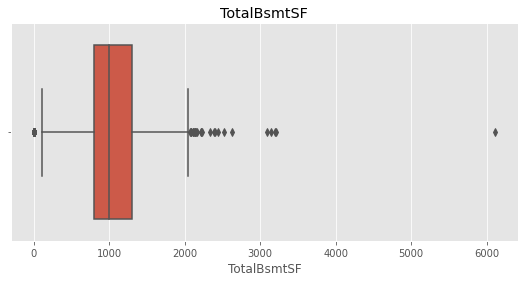

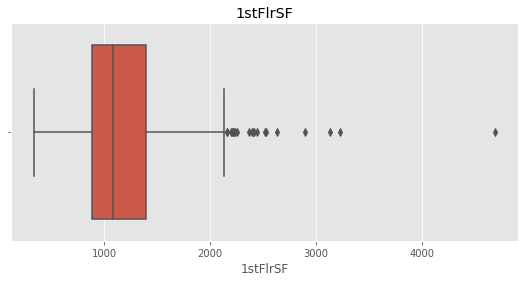

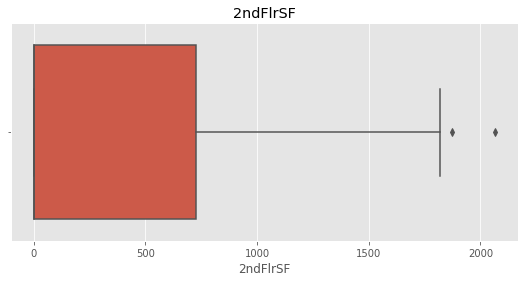

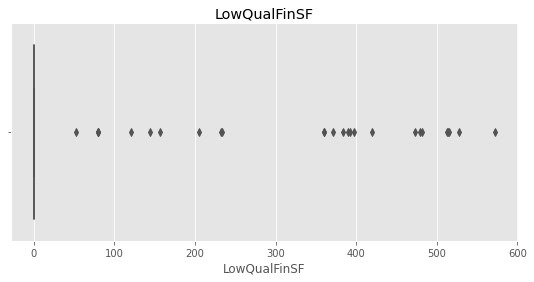

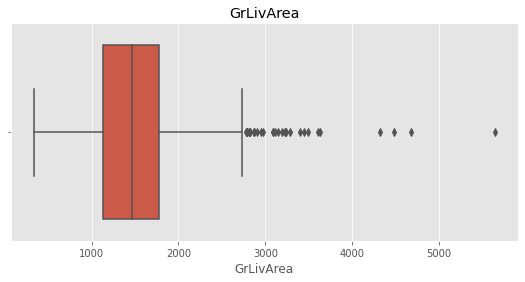

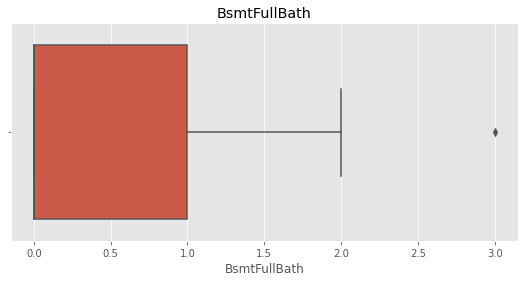

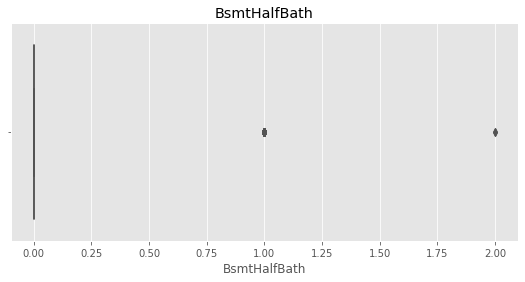

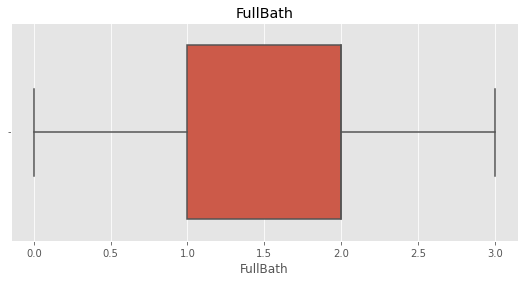

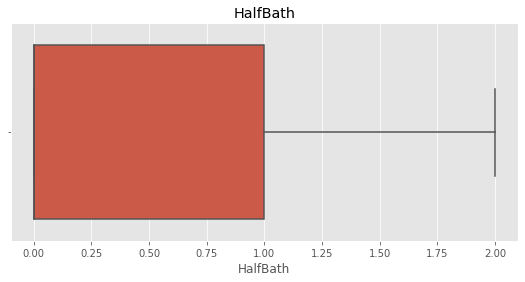

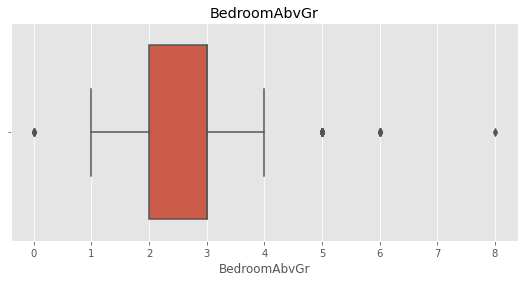

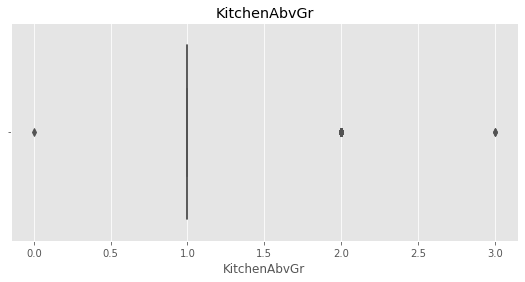

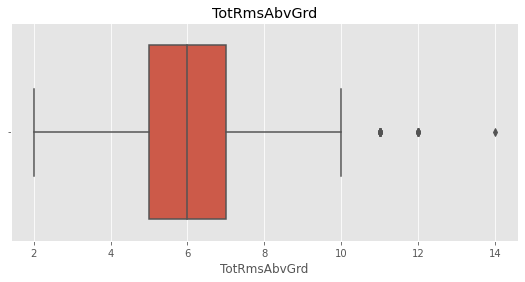

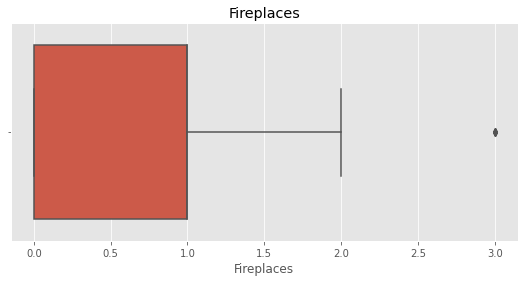

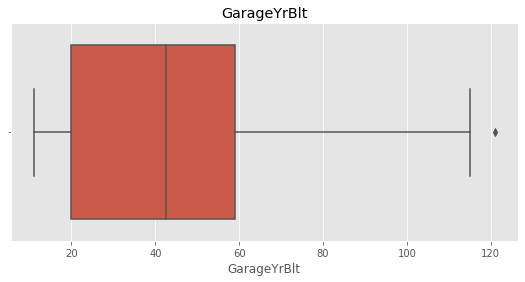

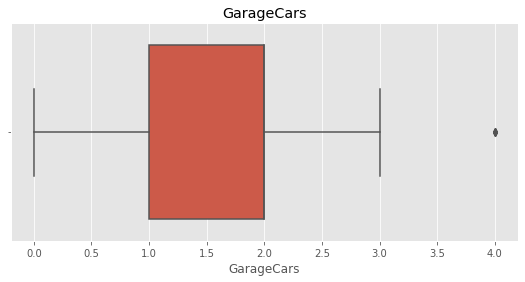

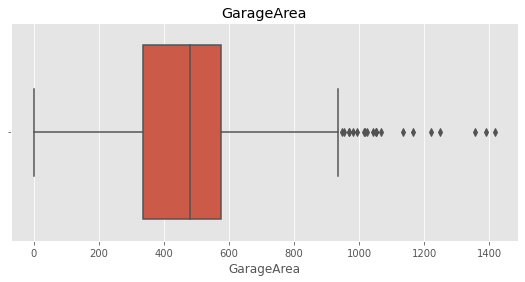

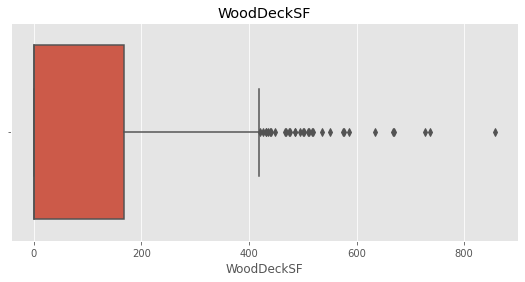

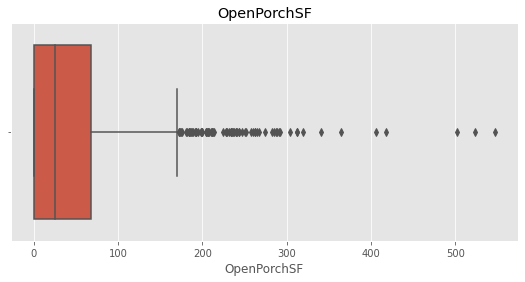

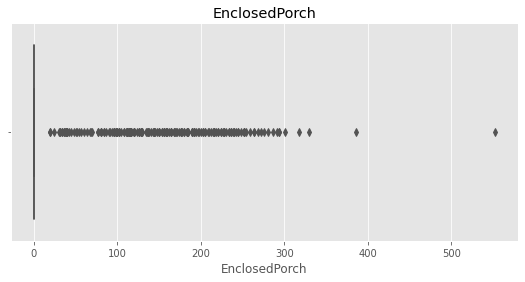

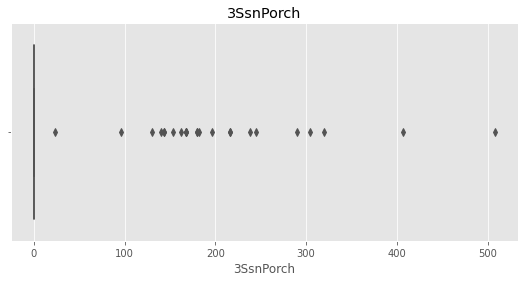

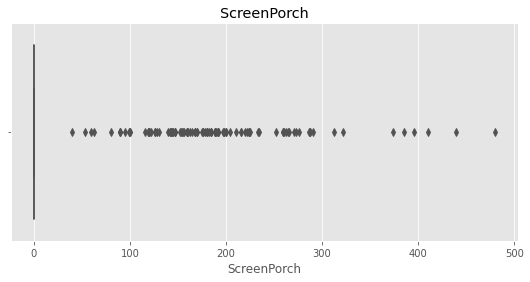

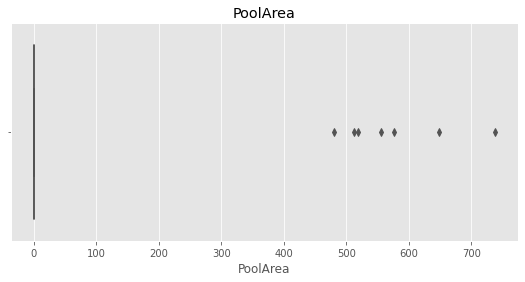

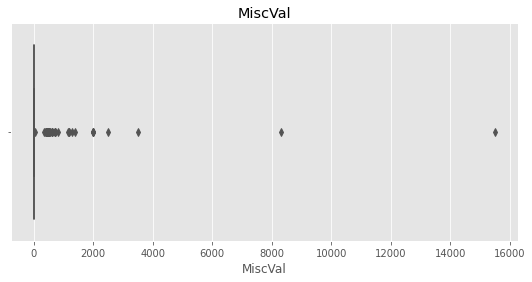

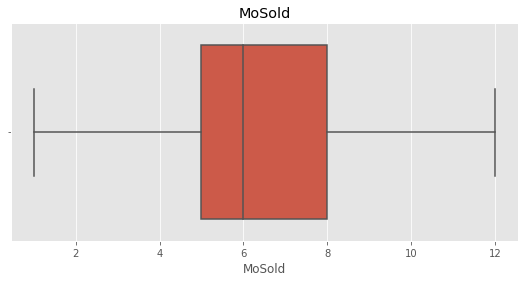

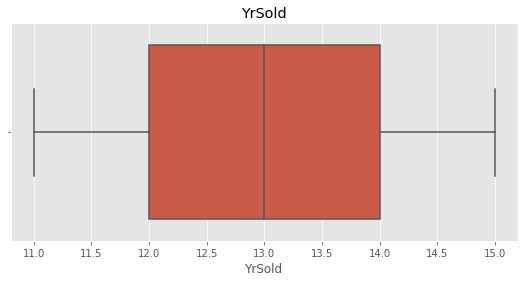

In [53]:
#Plotting boxplots for numerical variables to visualize outliers
plt.style.use('ggplot')
for column in numerical_columns:
  if column=='Id' or column=='SalePrice':
    pass
  else:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.boxplot(column, data=data)
    plt.title(column)

In [54]:
data[numerical_columns].describe(percentiles = [0.25,0.50,0.75,0.90,.99])

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1460.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    69.863699   10516.828082    49.732192     36.134247   
std     421.610009    22.027677    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000    11.000000     11.000000   
25%     365.750000    60.000000    7553.500000    21.000000     17.000000   
50%     730.500000    69.000000    9478.500000    48.000000     27.000000   
75%    1095.250000    79.000000   11601.500000    67.000000     54.000000   
90%    1314.100000    92.000000   14381.700000    96.100000     71.000000   
99%    1445.410000   137.410000   37567.640000   121.820000     71.000000   
max    1460.000000   313.000000  215245.000000   149.000000     71.000000   

        Remodelled   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.523288   103.117123   443.639726    46.549315   567.240411   
std       0.499629   180.731373   456.098091   161.319273   441.866955   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   223.000000   
50%       1.000000     0.000000   383.500000     0.000000   477.500000   
75%       1.000000   164.250000   712.250000     0.000000   808.000000   
90%       1.000000   335.000000  1065.500000   117.200000  1232.000000   
99%       1.000000   791.280000  1572.410000   830.380000  1797.050000   
max       1.000000  1600.000000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   1057.429452  1162.626712   346.992466      5.844521  1515.463699   
std     438.705324   386.587738   436.528436     48.623081   525.480383   
min       0.000000   334.000000     0.000000      0.000000   334.000000   
25%     795.750000   882.000000     0.000000      0.000000  1129.500000   
50%     991.500000  1087.000000     0.000000      0.000000  1464.000000   
75%    1298.250000  1391.250000   728.000000      0.000000  1776.750000   
90%    1602.200000  1680.000000   954.200000      0.000000  2158.300000   
99%    2155.050000  2219.460000  1418.920000    360.000000  3123.480000   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000   

       BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  \
count   1460.000000   1460.000000  1460.000000  1460.000000   1460.000000   
mean       0.425342      0.057534     1.565068     0.382877      2.866438   
std        0.518911      0.238753     0.550916     0.502885      0.815778   
min        0.000000      0.000000     0.000000     0.000000      0.000000   
25%        0.000000      0.000000     1.000000     0.000000      2.000000   
50%        0.000000      0.000000     2.000000     0.000000      3.000000   
75%        1.000000      0.000000     2.000000     1.000000      3.000000   
90%        1.000000      0.000000     2.000000     1.000000      4.000000   
99%        2.000000      1.000000     3.000000     1.000000      5.000000   
max        3.000000      2.000000     3.000000     2.000000      8.000000   

       KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars  \
count   1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean       1.046575      6.517808     0.613014    42.493836     1.767123   
std        0.220338      1.625393     0.644666    23.994583     0.747315   
min        0.000000      2.000000     0.000000    11.000000     0.000000   
25%        1.000000      5.000000     0.000000    20.000000     1.000000   
50%        1.000000      6.000000     1.000000    42.493836     2.000000   
75%        1.000000      7.000000     1.000000    59.000000     2.000000   
90%        1.000000      9.000000     1.000000    73.000000     3.00000

Analyzing data spread of columns like LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea and it's effect w.r.t SalePrice because rest other columns like PoolArea, ScreenPorch etc having outliers seems justified outliers.


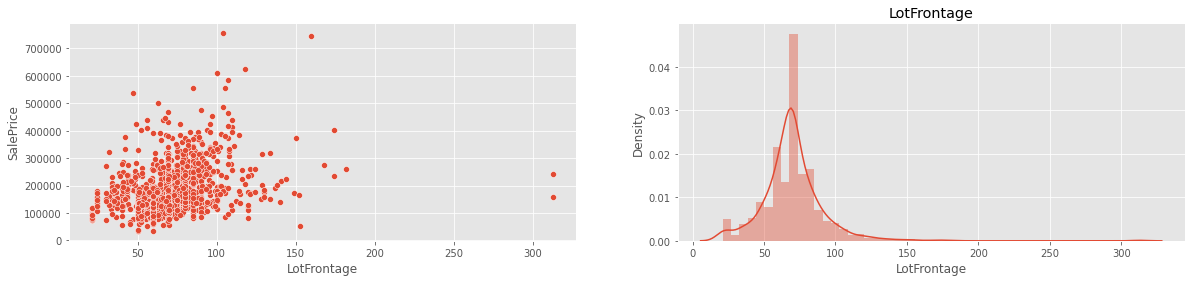

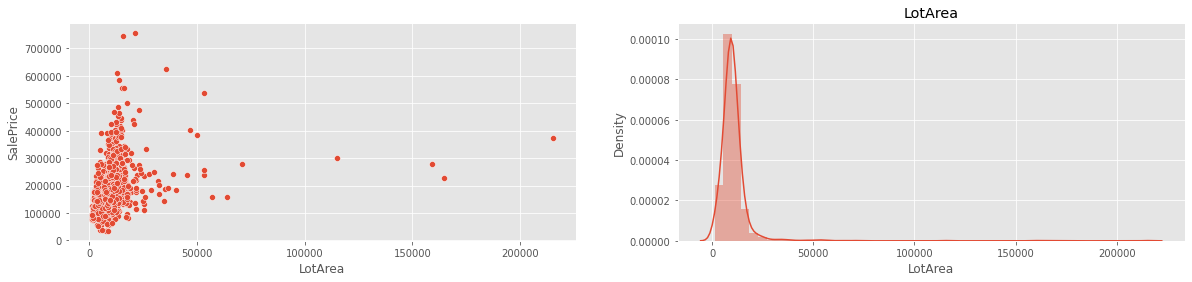

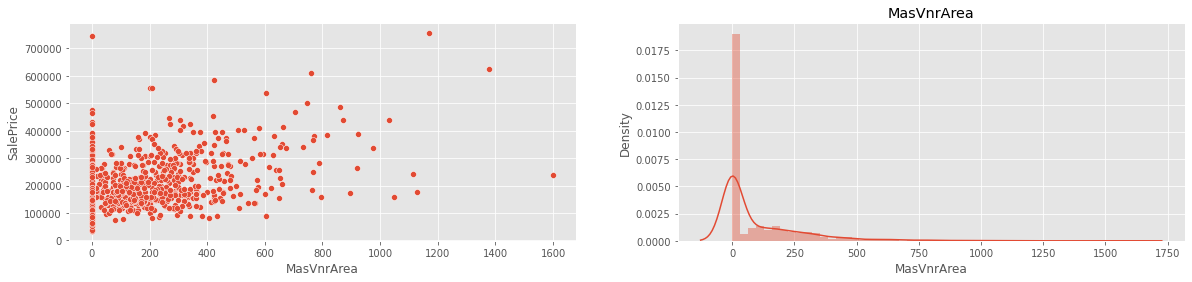

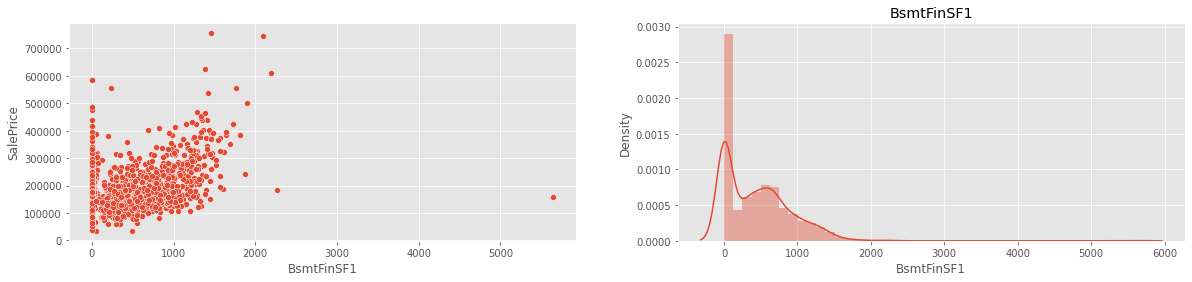

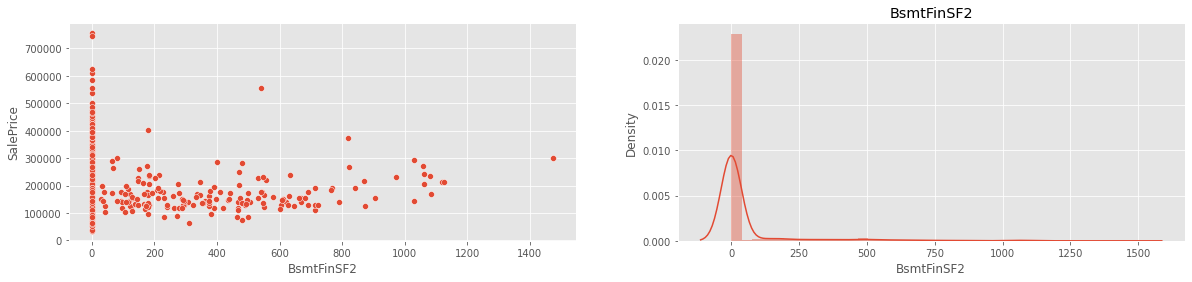

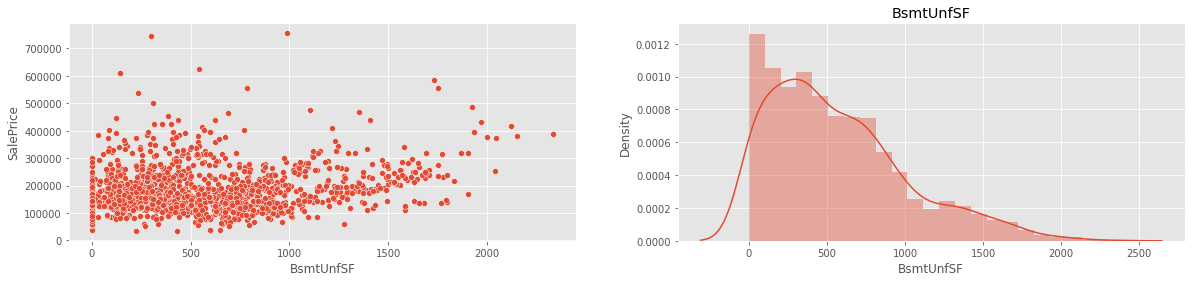

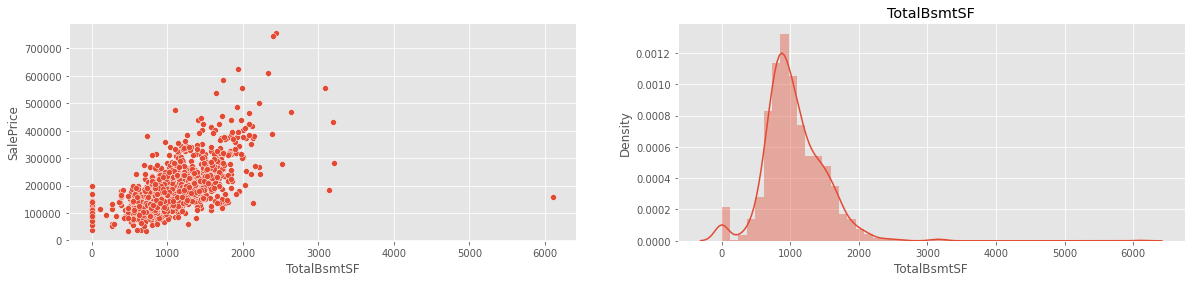

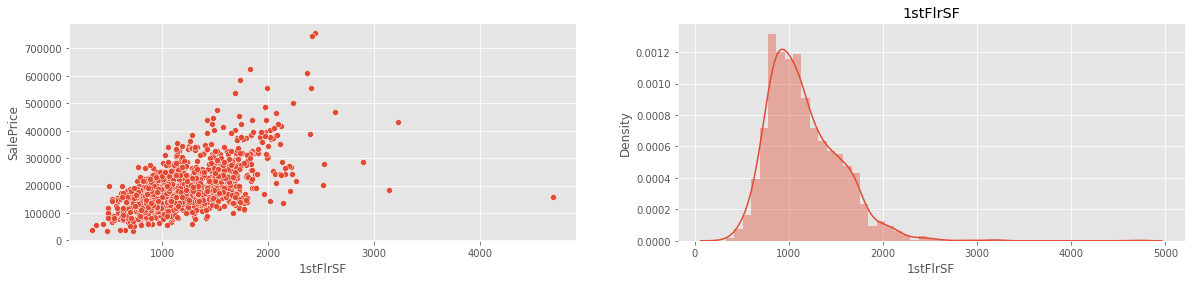

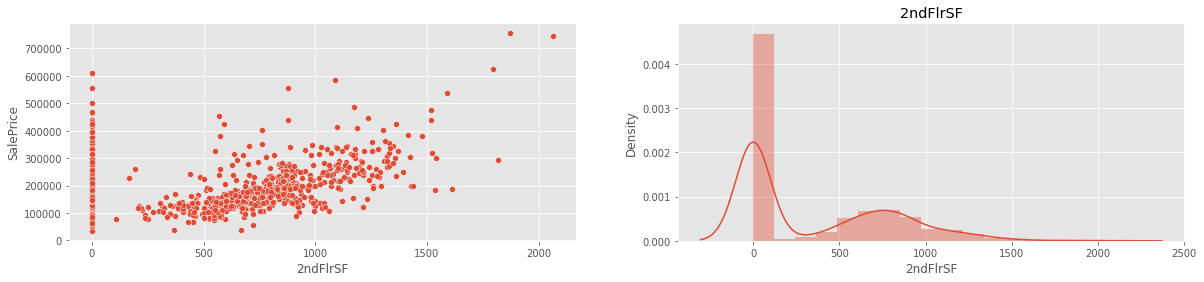

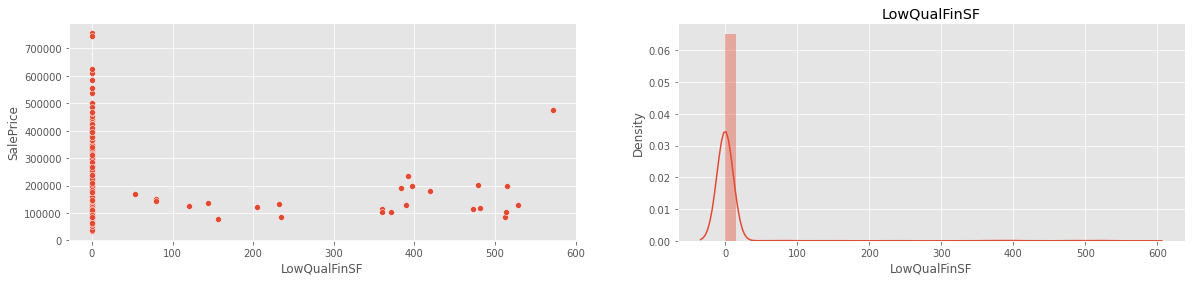

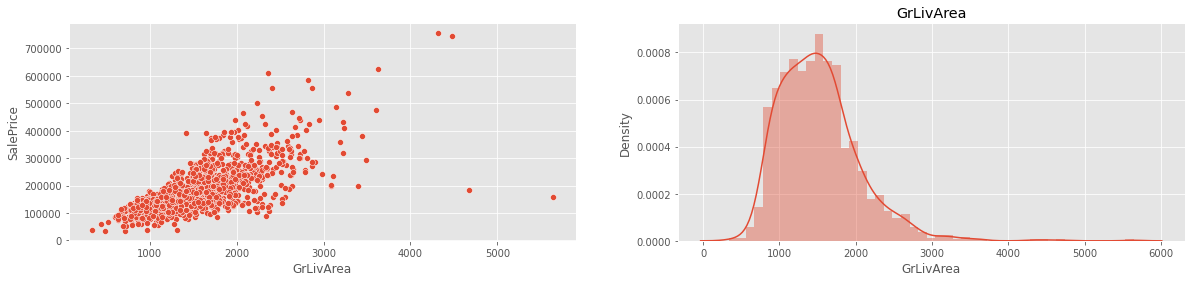

In [55]:
plt.style.use('ggplot')
for i in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.scatterplot(x=data[i], y=data.SalePrice)
    plt.subplot(122)
    sns.distplot(data[i], kde=True)
    plt.title(i)

Imputing data of the most obvious fields from the above plots.

In [56]:
#Imputing LotFrontage column with values> 162 with median since the distribution is right skewed.
data.LotFrontage=np.where(data.LotFrontage>162, data.LotFrontage.median(),data.LotFrontage)

#Imputing LotArea column with values> 30000 with median since the distribution is right skewed.
data.LotArea=np.where(data.LotArea>30000, data.LotArea.median(), data.LotArea)

#Imputing MasVnrArea column with values> 1400 with median since the distribution is right skewed.
data.MasVnrArea=np.where(data.MasVnrArea>1400, data.MasVnrArea.median(), data.MasVnrArea)

#Imputing MasVnrArea column with values> 5000 with median since the distribution is right skewed.
data.BsmtFinSF1=np.where(data.BsmtFinSF1>5000, data.BsmtFinSF1.median(), data.BsmtFinSF1)

#Imputing BsmtUnfSF column with values> 1600 with 1600.
data.BsmtUnfSF=np.where(data.BsmtUnfSF>1600, 1600, data.BsmtUnfSF)

#Imputing TotalBsmtSF column with values> 6000 with 3200 since the distribution is right skewed.
data.TotalBsmtSF=np.where(data.TotalBsmtSF>6000, 3200, data.TotalBsmtSF)

#Imputing 1stFlrSF column with values> 3000 with median since the distribution is right skewed.
data['1stFlrSF']=np.where(data['1stFlrSF']>3000, data['1stFlrSF'].median(), data['1stFlrSF'])

#Imputing GrLivArea column with values> 3000 with median since the distribution is right skewed.
data.GrLivArea=np.where(data.GrLivArea> 4500, data.GrLivArea.median(), data.GrLivArea)

Columns BsmtFinSF2 and LowQualFinSF need to be further analyzed differently due to its huge number of outliers.

Since 25th and 75th percdentile of column BsmtFinSF2 are 0, we cannot use the IQR method to treat outlier.

In [57]:
#Checking the mean, median, mode of BsmtFinSF2
print(data.BsmtFinSF2.mean())
print(data.BsmtFinSF2.median())
print(data.BsmtFinSF2.mode())

46.54931506849315
0.0
0    0
dtype: int64


In [58]:
#There are 167 rows with value>0 and hence for these rows, the data cannot be imputed by just mean or median w.r.t entire dataset.
#Hence checking mean, median and mode of the column for rows with value>0

In [59]:
print(data[data['BsmtFinSF2']>0].BsmtFinSF2.mean())
print(data[data['BsmtFinSF2']>0].BsmtFinSF2.median())
print(data[data['BsmtFinSF2']>0].BsmtFinSF2.mode())
print(len(data[data['BsmtFinSF2']>0]))

406.9580838323353
354.0
0    180
dtype: int64
167


In [60]:
#Imputing data in the column BsmtFinSF2 with median for rows with value>median
data.BsmtFinSF2=np.where(data.BsmtFinSF2>data.BsmtFinSF2.median(), data[data['BsmtFinSF2']>0].BsmtFinSF2.median(), data['BsmtFinSF2'])

In [61]:
print(data.LowQualFinSF.mean())
print(data.LowQualFinSF.median())
print(data.LowQualFinSF.mode())

5.844520547945206
0.0
0    0
dtype: int64


In [62]:
print(data[data['LowQualFinSF']>0].LowQualFinSF.mean())
print(data[data['LowQualFinSF']>0].LowQualFinSF.median())
print(data[data['LowQualFinSF']>0].LowQualFinSF.mode())
print(len(data[data['LowQualFinSF']>0]))

328.1923076923077
377.5
0    80
dtype: int64
26


In [63]:
#Since only 26 rows in the column LowQualFinSF has value > 0, dropping the column
data.drop('LowQualFinSF', axis=1, inplace=True)

Data Cleaning complete. Checking the spread of data across the numerical columns and it's relationship with SalePrice

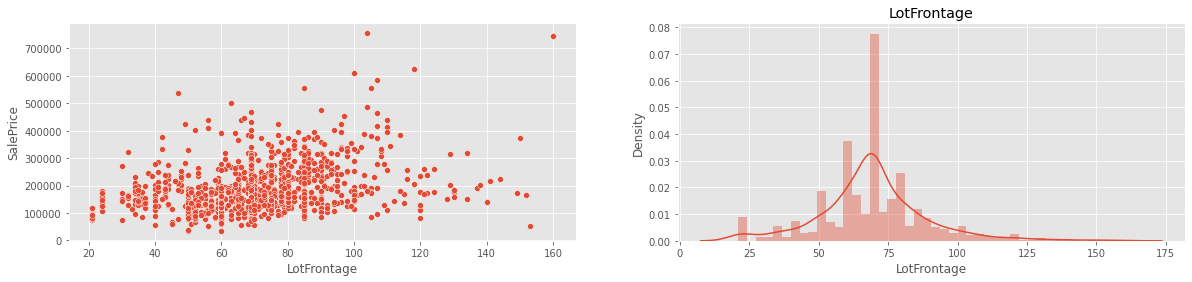

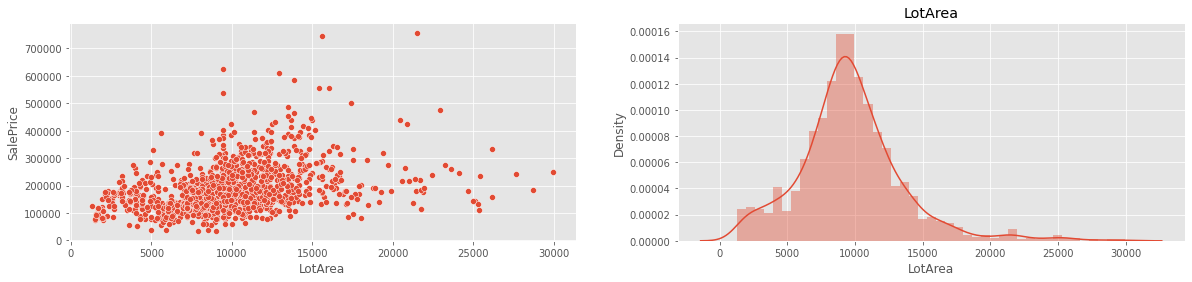

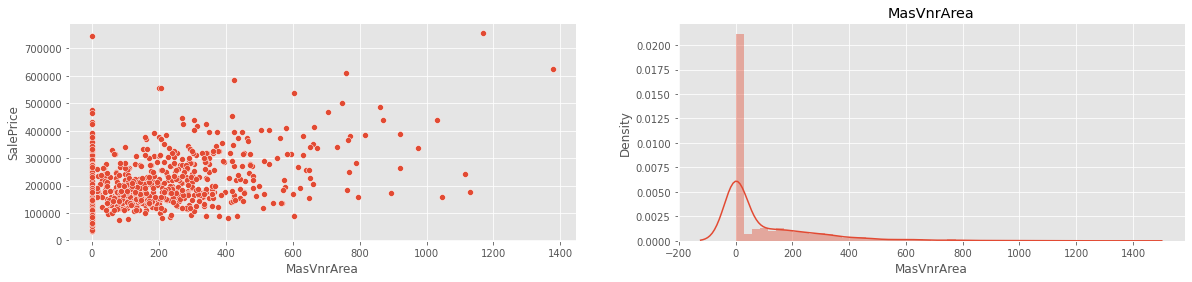

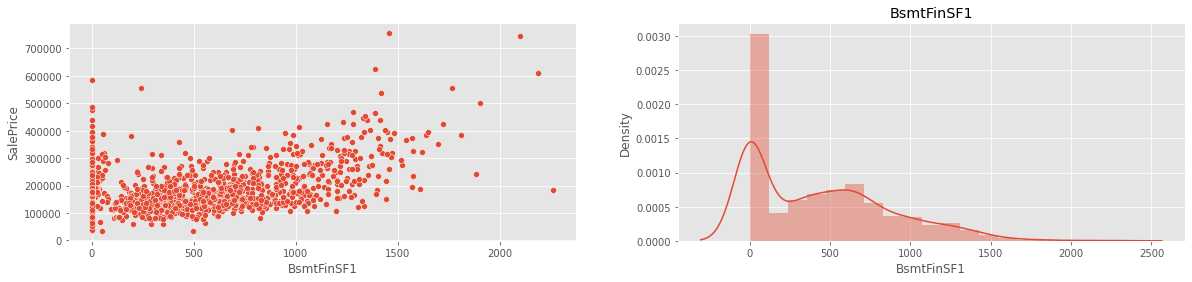

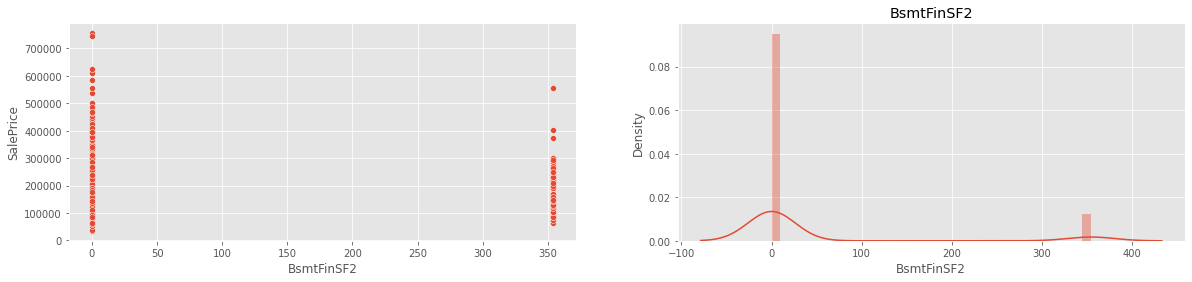

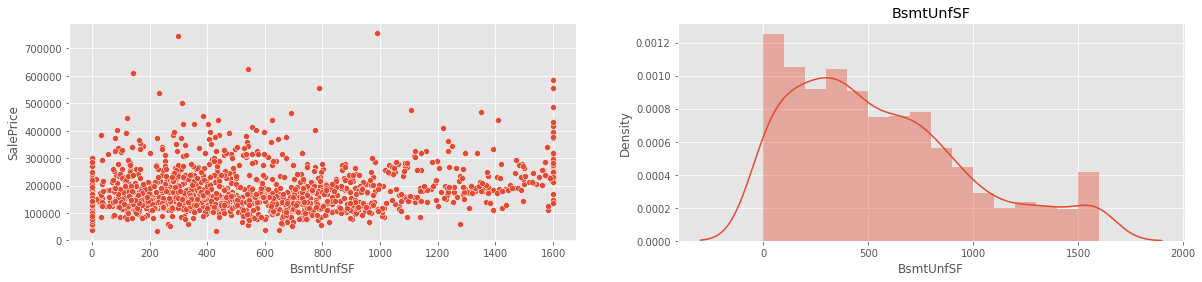

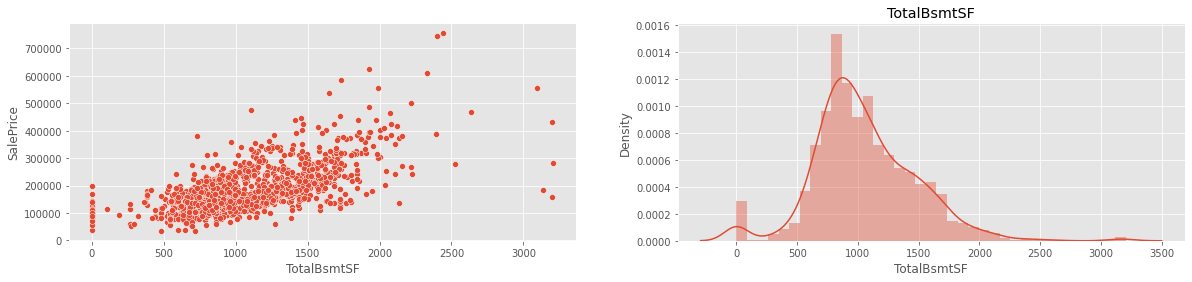

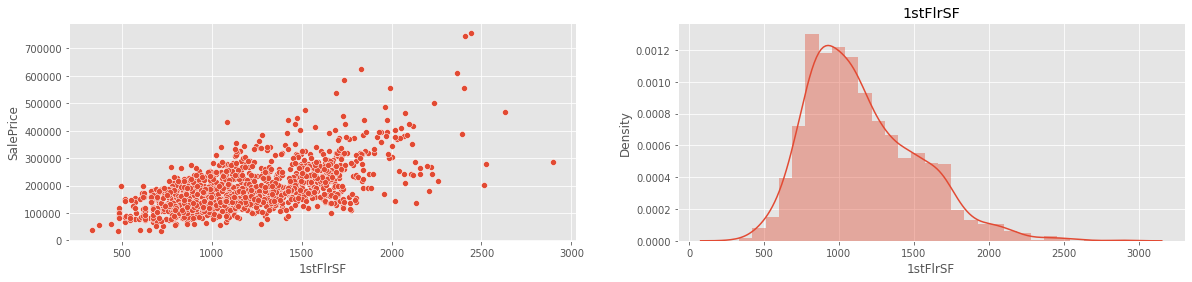

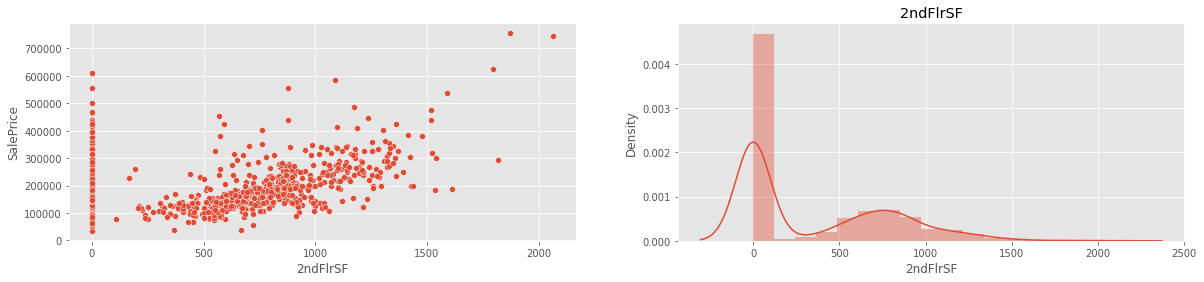

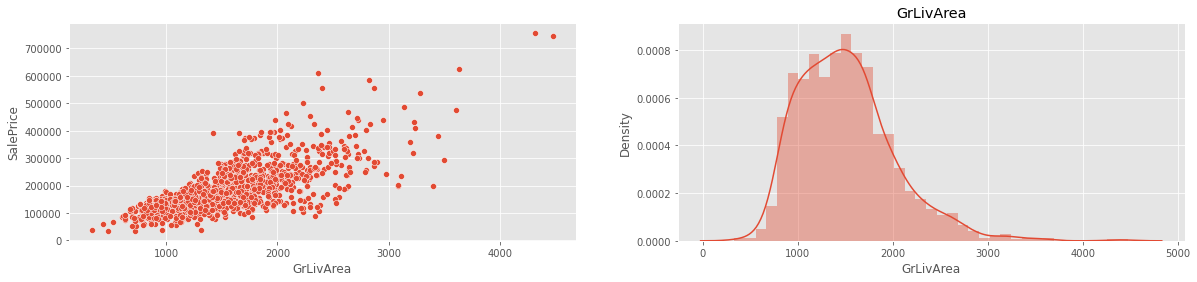

In [64]:
plt.style.use('ggplot')
for i in ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
          'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea']:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.scatterplot(x=data[i], y=data.SalePrice)
    plt.subplot(122)
    sns.distplot(data[i], kde=True)
    plt.title(i)

In [65]:
print(len(data[data['BsmtFinSF2']==0])/len(data))
print(len(data[data['2ndFlrSF']==0])/len(data))

0.8856164383561644
0.5678082191780822


Since the column BsmtFinSF2 has 88% of the values=0, dropping the column

In [66]:
data.drop('BsmtFinSF2', axis=1, inplace=True)

In [67]:
data.shape

(1460, 53)

In [68]:
columns_after_data_cleaning=data.columns
columns_after_data_cleaning

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'LotShape',
       'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'Remodelled', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
#Changing back the variables into integer that were converted into categorical variable for analysis
data.MSSubClass=data.MSSubClass.astype('int')
data.OverallQual=data.OverallQual.astype('int')
data.OverallCond=data.OverallCond.astype('int')

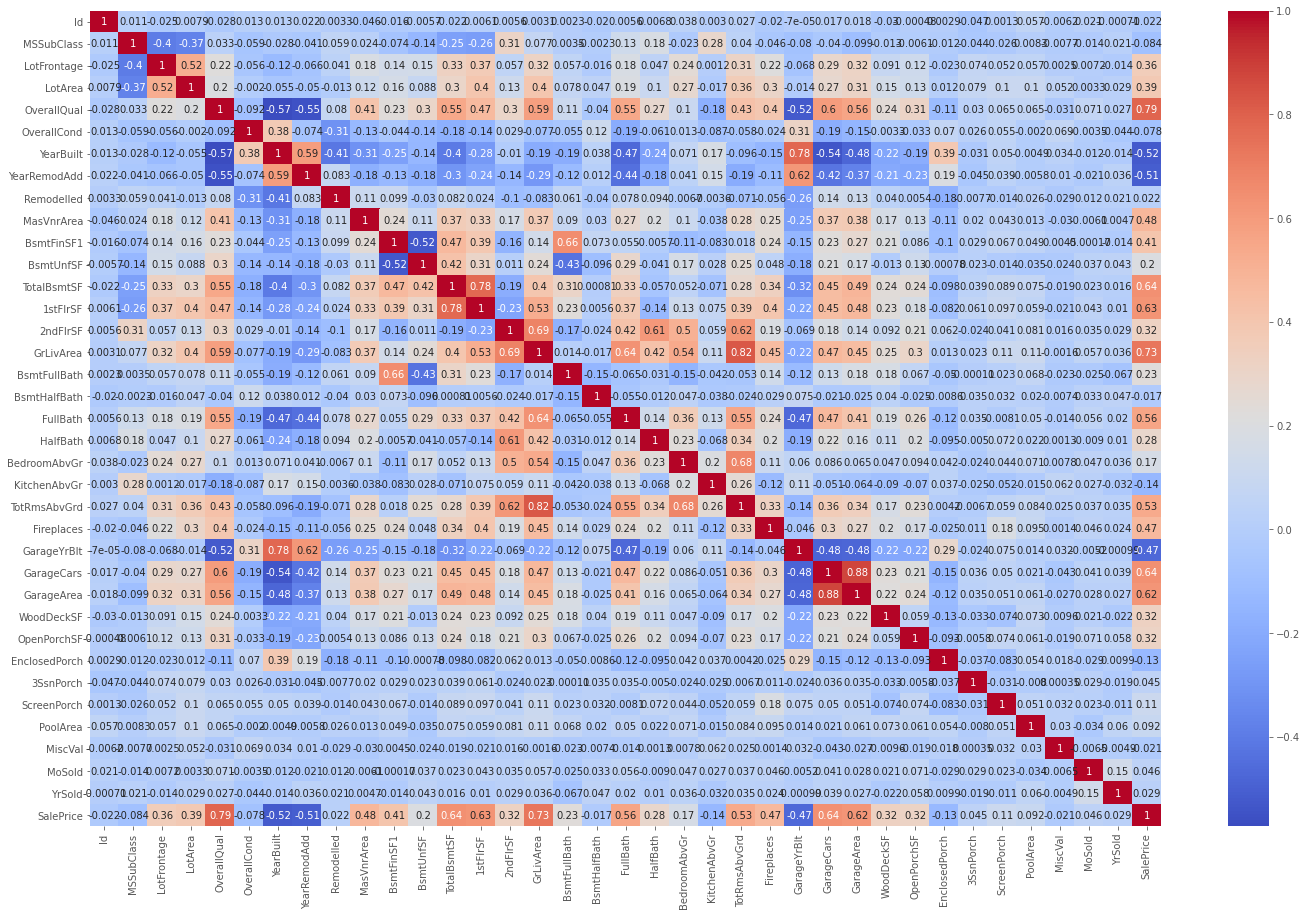

In [70]:
#Plotting a heatmap for analyzing the corellation of variables with each other
plt.figure(figsize = (24, 15))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()



1.   SalePrice is positively and highly corelated to OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea
2.   SalePrice is negatively and highly corelated YearBuilt, YearRemodAdd, GarageYrBlt.



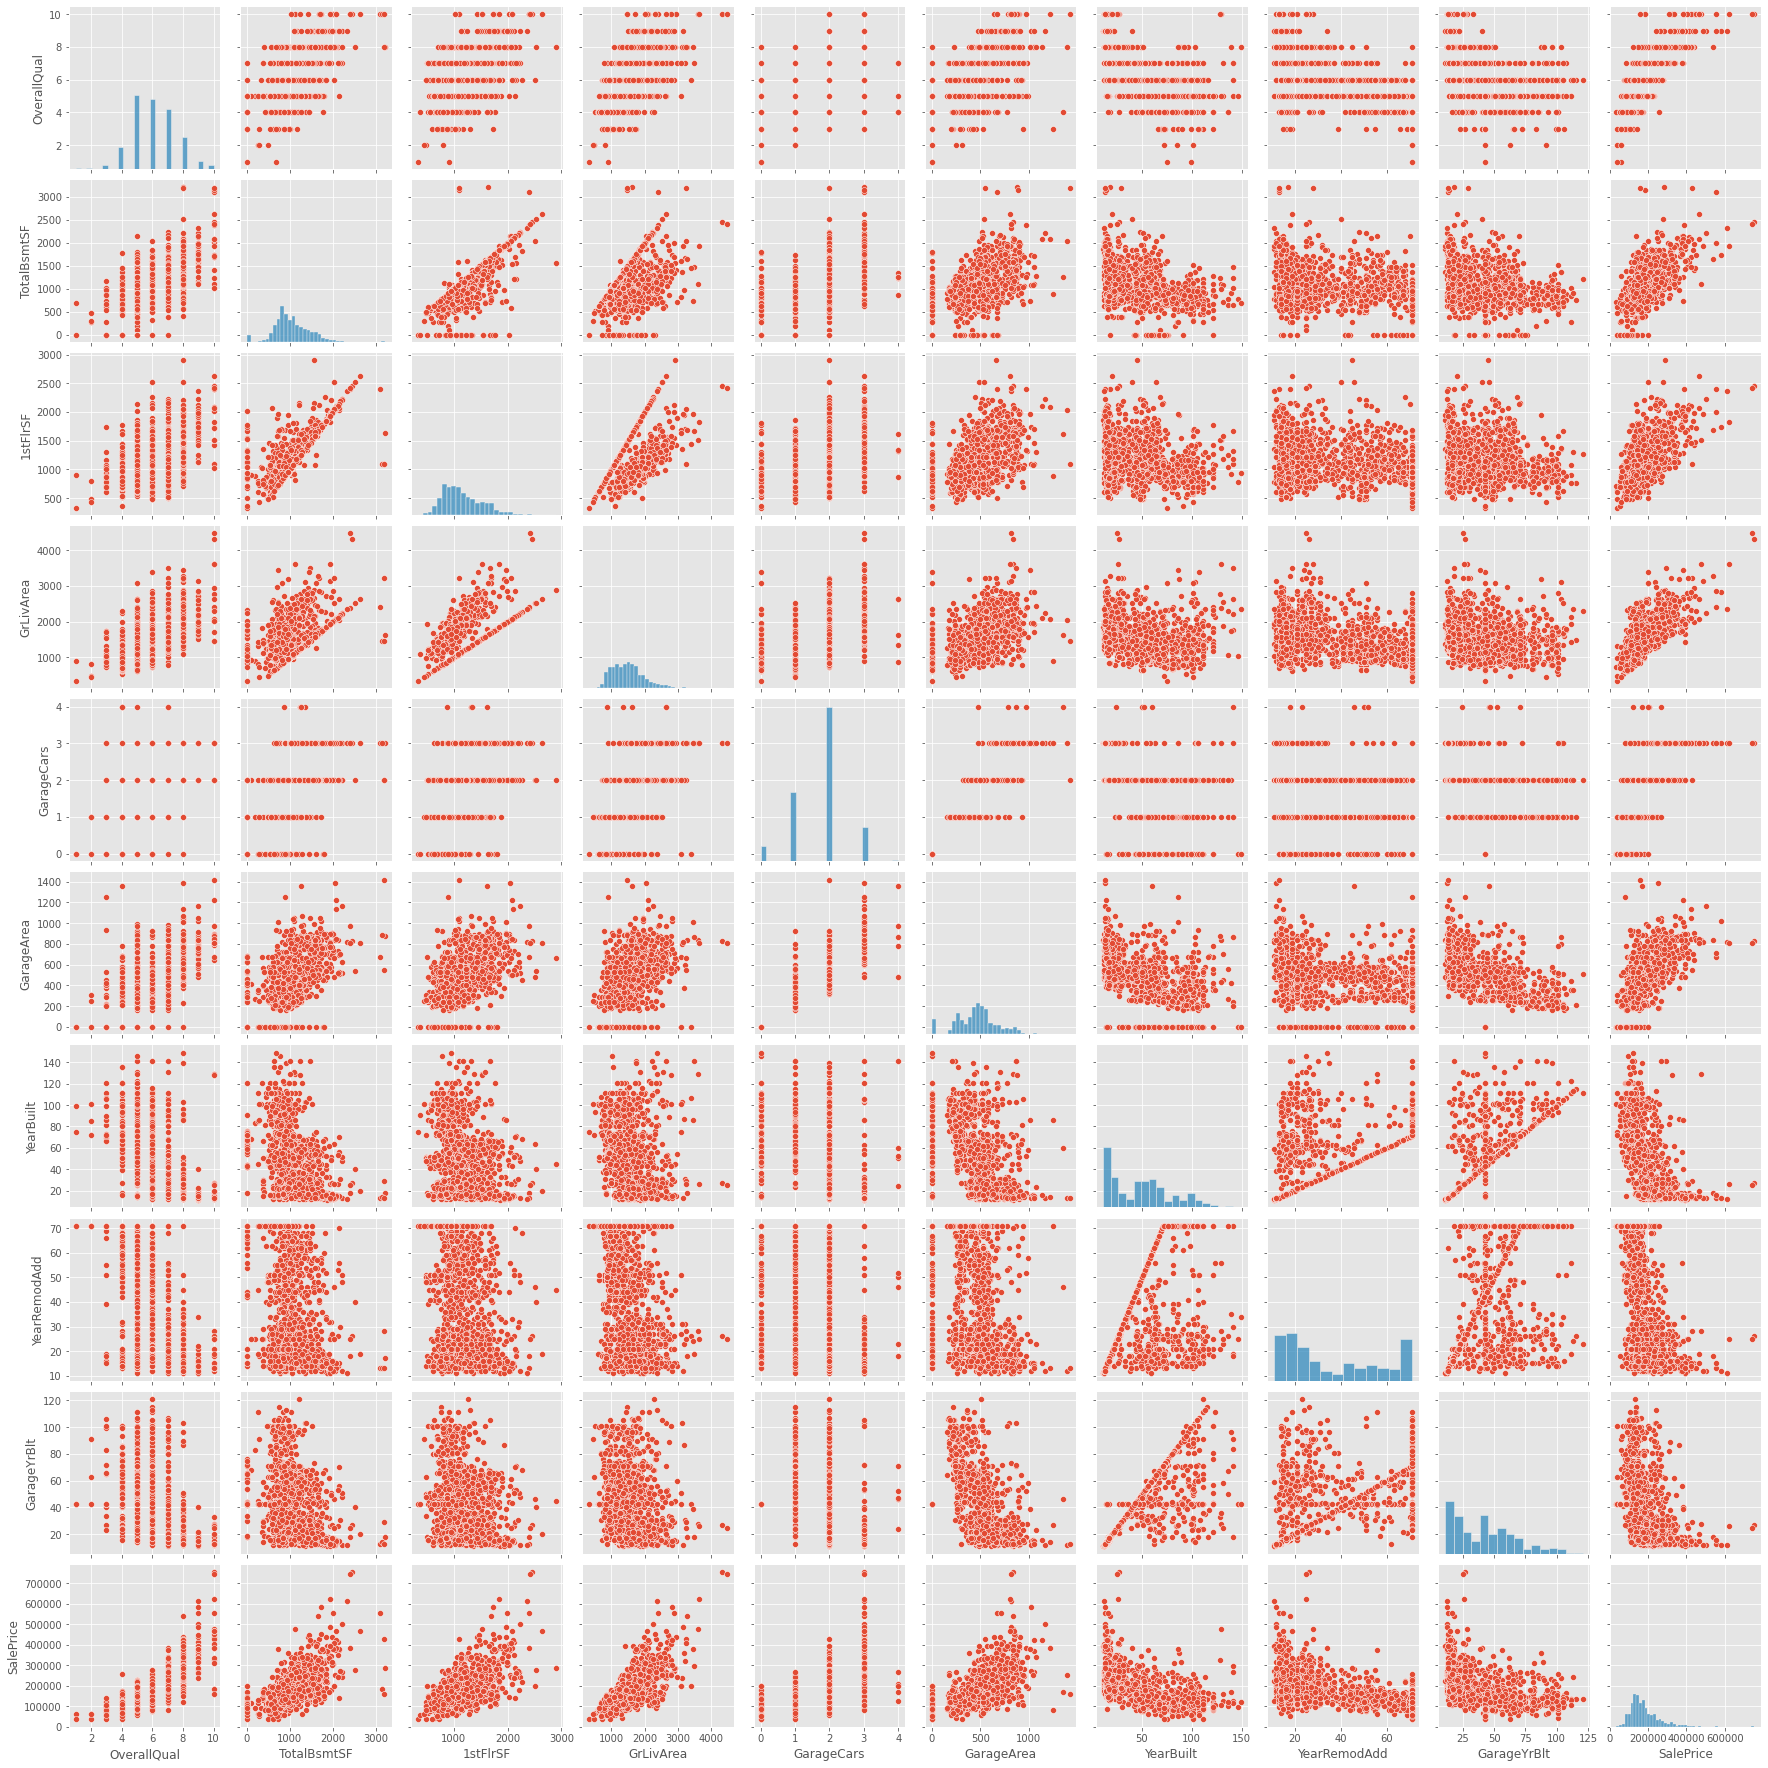

In [71]:
#Plotting a pairplot for the above variables to check the linearity
sns.pairplot(data[['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea',
                   'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice']])
plt.show()

The columns which were positively corelated with SalePrice like OverallQual, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageCars, GarageArea shows a linearly increasing trend. But the columns like YearBuilt, YearRemodAdd, GarageYrBlt which were negatively corelated has a decreasing trend but doesn't show an exact linearly decreasing trend.

## **2.3 Data Preparation**

In [72]:
#Again changing the datatype of columns MSSubClass, OverallQual, OverallCond
data.MSSubClass=data.MSSubClass.astype('object')
data.OverallQual=data.OverallQual.astype('object')
data.OverallCond=data.OverallCond.astype('object')

In [73]:
#Re-populating the list numerical_columns with updated dataset
numerical_columns=list(data.select_dtypes(include=np.number).columns)
numerical_columns

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'Remodelled',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [74]:
#shape of data
data.shape

(1460, 53)

In [75]:
#Dividing the dataset-data into X and y variables
y=data.SalePrice
X=data.drop('SalePrice', axis=1)

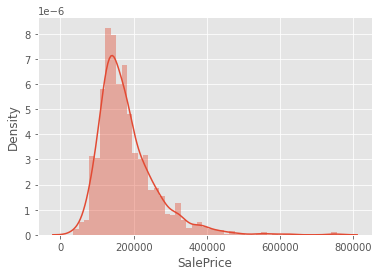

In [76]:
#Checking the spread of target variable
sns.distplot(y, kde=True)
plt.show()

Since the Target variable SalePrice is right skewed, transforming the data using log transformation to reduce the skewness of our original data and make it as “normal” as possible.

In [77]:
y=np.log(y)

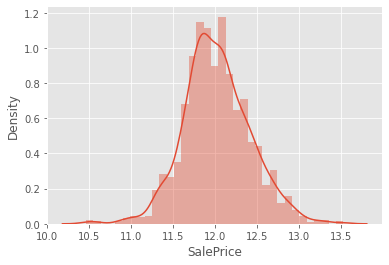

In [78]:
#Now checking the spread of target variable
sns.distplot(y, kde=True)
plt.show()

**Dummy variables creation**

In [79]:
#Creating dummy variables for categorical variables and adding them to the dataset.
for i in data.select_dtypes(exclude=np.number).columns:
  dummy=pd.get_dummies(data[i], drop_first=True)
  dummy =dummy.add_prefix(f'{i}_')
  X =pd.concat([X, dummy], axis = 1)
  X.drop(i, axis=1, inplace=True)

In [80]:
#Shape of X dataframe after dummy variables creation
X.shape

(1460, 173)

In [81]:
X.head()

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  Remodelled  MasVnrArea  \
0   1         65.0   8450.0         18            18           1       196.0   
1   2         80.0   9600.0         45            45           1         0.0   
2   3         68.0  11250.0         20            19           0       162.0   
3   4         60.0   9550.0        106            51           0         0.0   
4   5         84.0  14260.0         21            21           1       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0       706.0        150          856     856.0       854     1710.0   
1       978.0        284         1262    1262.0         0     1262.0   
2       486.0        434          920     920.0       866     1786.0   
3       216.0        540          756     961.0       756     1717.0   
4       655.0        490         1145    1145.0      1053     2198.0   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  \
0             8           0         18.0           2         548           0   
1             6           1         45.0           2         460         298   
2             6           1         20.0           2         608           0   
3             7           1         23.0           3         642           0   
4             9           1         21.0           3         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0       2      13              0              0              0              0   
1       5      14              0              0              0              0   
2       9      13              0              0              0              0   
3       2      15              0              0              0              0   
4      12      13              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

   MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   
3              0               0               0               0   
4              0               0               0               0   

   MSSubClass_190  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
0               0             0             0             1   
1               0             0             0             1   
2               0             0             0             0   
3               0             0    

**Dividing the X and Y variables into Train and test datasets**

In [82]:
#Splitting the datasets X and y into test and train
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.7, random_state=42)

#Shape of the datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1021, 173)
(1021,)
(439, 173)
(439,)


**Scaling the numerical variables**

In [83]:
# Coping the numerical columns into another list so that Id and SalePrice can be removed from the same
X_numerical_columns=numerical_columns.copy()

X_numerical_columns.remove('Id')
X_numerical_columns.remove('SalePrice')

In [84]:
#Printing both the lists to see the difeerence
print(X_numerical_columns)
print(numerical_columns)

['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'Remodelled', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'Remodelled', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [85]:
#Scaling the variables. Using Standard scalar for scaling to handle outliers
scalar=StandardScaler()

#Scaling the numeric variables but not the dummy variables created.
X_train[X_numerical_columns]=scalar.fit_transform(X_train[X_numerical_columns])
X_test[X_numerical_columns]=scalar.fit_transform(X_test[X_numerical_columns])

In [86]:
#Head of the dataset after scaling.
X_train.head()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  Remodelled  \
1452  1453    -1.755037 -1.562601  -1.105862     -0.975231    0.960618   
762    763     0.136979 -0.276855  -1.235948     -1.168077    0.960618   
932    933     0.750606  0.507800  -1.138383     -1.023443    0.960618   
435    436    -1.345952  0.248061  -0.813167     -0.541328    0.960618   
629    630     0.648335 -0.178449   0.227524      1.001438    0.960618   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
1452   -0.143650    0.245441  -1.311074    -1.202575 -0.247222 -0.802940   
762    -0.607545   -0.970843   0.386567    -0.709444 -1.097054  0.972627   
932     1.143660   -1.026657   2.399618     2.001594  2.051187 -0.802940   
435    -0.607545   -0.131305  -1.148731    -0.607987 -0.923225  1.088277   
629     0.894316    0.424512  -0.643149     0.451418  0.519834 -0.802940   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1452  -0.889805      1.111135     -0.247791 -1.068975 -0.759102     -1.097637   
762    0.049736     -0.814958     -0.247791  0.768438  1.264510      0.135242   
932    0.757854     -0.814958     -0.247791  0.768438 -0.759102      0.135242   
435    0.275226      1.111135     -0.247791  0.768438  1.264510      0.135242   
629   -0.339926      1.111135     -0.247791 -1.068975  1.264510      0.135242   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1452     -0.212426     -0.947493   -0.942382    -1.090105    0.296221   
762      -0.212426      0.279381   -0.942382    -1.255750    0.296221   
932      -0.212426      0.892819    0.594634    -1.131516    1.664736   
435      -0.212426     -0.334056    0.594634    -0.717403    0.296221   
629      -0.212426     -0.334056   -0.942382     0.607757    0.296221   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1452    0.229957   -0.740733    -0.311814      -0.346561  -0.119377   
762     0.656945    0.542566    -0.066108      -0.346561  -0.119377   
932     1.491731   -0.740733     2.044066      -0.346561  -0.119377   
435     0.349897    0.459038     0.165144      -0.346561  -0.119377   
629     0.205969    0.595720    -0.716505      -0.346561  -0.119377   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass_30  \
1452    -0.276042 -0.069227 -0.123048 -0.515263  1.368167              0   
762     -0.276042 -0.069227 -0.123048 -0.137872 -1.648893              0   
932     -0.276042 -0.069227 -0.123048 -1.270045  0.613902              0   
435     -0.276042 -0.069227 -0.123048 -0.892654 -0.894628              0   
629     -0.276042 -0.069227 -0.123048 -0.137872 -0.140363              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1452              0              0              0              0   
762               0              0              0              1   
932               0              0              0              0   
435               0              0              0              1   
629               0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
1452              0              0              0              0   
762               0              0              0              0   
932               0              0              0              0   
435               0              0              0              0   
629               0              0              1              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
1452              0               0               0               1   
762               0               0               0               0   
932               0               0               0               0   
435               0               0               0               0   
629               0               0               0               0   

      MSSubClass_190  LotShape_IR2  LotShape_IR3  L

In [87]:
#Coping X_train dataset to X_train_model dataset for modelling so that the oridinal scaled data which has Id is intact
X_train_model=X_train.copy()
X_train_model.drop('Id', axis=1, inplace=True)

In [88]:
#Head of the new dataset
print(X_train_model.shape)
X_train_model.head()

(1021, 172)


LotFrontage   LotArea  YearBuilt  YearRemodAdd  Remodelled  MasVnrArea  \
1452    -1.755037 -1.562601  -1.105862     -0.975231    0.960618   -0.143650   
762      0.136979 -0.276855  -1.235948     -1.168077    0.960618   -0.607545   
932      0.750606  0.507800  -1.138383     -1.023443    0.960618    1.143660   
435     -1.345952  0.248061  -0.813167     -0.541328    0.960618   -0.607545   
629      0.648335 -0.178449   0.227524      1.001438    0.960618    0.894316   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
1452    0.245441  -1.311074    -1.202575 -0.247222 -0.802940  -0.889805   
762    -0.970843   0.386567    -0.709444 -1.097054  0.972627   0.049736   
932    -1.026657   2.399618     2.001594  2.051187 -0.802940   0.757854   
435    -0.131305  -1.148731    -0.607987 -0.923225  1.088277   0.275226   
629     0.424512  -0.643149     0.451418  0.519834 -0.802940  -0.339926   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1452      1.111135     -0.247791 -1.068975 -0.759102     -1.097637   
762      -0.814958     -0.247791  0.768438  1.264510      0.135242   
932      -0.814958     -0.247791  0.768438 -0.759102      0.135242   
435       1.111135     -0.247791  0.768438  1.264510      0.135242   
629       1.111135     -0.247791 -1.068975  1.264510      0.135242   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
1452     -0.212426     -0.947493   -0.942382    -1.090105    0.296221   
762      -0.212426      0.279381   -0.942382    -1.255750    0.296221   
932      -0.212426      0.892819    0.594634    -1.131516    1.664736   
435      -0.212426     -0.334056    0.594634    -0.717403    0.296221   
629      -0.212426     -0.334056   -0.942382     0.607757    0.296221   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
1452    0.229957   -0.740733    -0.311814      -0.346561  -0.119377   
762     0.656945    0.542566    -0.066108      -0.346561  -0.119377   
932     1.491731   -0.740733     2.044066      -0.346561  -0.119377   
435     0.349897    0.459038     0.165144      -0.346561  -0.119377   
629     0.205969    0.595720    -0.716505      -0.346561  -0.119377   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass_30  \
1452    -0.276042 -0.069227 -0.123048 -0.515263  1.368167              0   
762     -0.276042 -0.069227 -0.123048 -0.137872 -1.648893              0   
932     -0.276042 -0.069227 -0.123048 -1.270045  0.613902              0   
435     -0.276042 -0.069227 -0.123048 -0.892654 -0.894628              0   
629     -0.276042 -0.069227 -0.123048 -0.137872 -0.140363              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
1452              0              0              0              0   
762               0              0              0              1   
932               0              0              0              0   
435               0              0              0              1   
629               0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
1452              0              0              0              0   
762               0              0              0              0   
932               0              0              0              0   
435               0              0              0              0   
629               0              0              1              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
1452              0               0               0               1   
762               0               0               0               0   
932               0               0               0               0   
435               0               0               0               0   
629               0               0               0               0   

      MSSubClass_190  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1452               

In [89]:
#Similarly Coping X_test dataset to X_test_model dataset for modelling so that the oridinal scaled data which has Id is intact
X_test_model=X_test.copy()
X_test_model.drop('Id', axis=1, inplace=True)
print(X_test_model.shape)
X_test_model.head()

(439, 172)


LotFrontage   LotArea  YearBuilt  YearRemodAdd  Remodelled  MasVnrArea  \
892      0.050470 -0.289682   0.308510     -0.878496   -1.063517   -0.516706   
1105     1.541747  0.707394  -0.766104     -0.486217   -1.063517    1.439412   
413     -0.695169 -0.147984   1.556450      1.720356   -1.063517   -0.516706   
522     -1.014729 -1.175684   0.863150      1.720356   -1.063517   -0.516706   
1036     1.062408  0.874006  -1.216749     -1.123671   -1.063517   -0.138451   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
892     0.506366  -0.379233     0.015464 -0.208840 -0.777614  -0.814406   
1105    1.332125  -0.294835     0.983538  0.929493  1.862300   2.229586   
413    -0.977314   1.096524    -0.106744 -0.314241 -0.777614  -0.892758   
522    -0.084421   0.124743    -0.116329 -0.377482  0.775277   0.353045   
1036    1.309747   0.107863     1.359745  1.245697 -0.777614   0.266858   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
892      -0.831704      4.070224 -0.933625 -0.768610      0.229743   
1105      1.100137     -0.225036  0.840667  1.148548      0.229743   
413      -0.831704     -0.225036 -0.933625 -0.768610     -0.985405   
522      -0.831704     -0.225036  0.840667 -0.768610      0.229743   
1036      1.100137     -0.225036  0.840667 -0.768610     -0.985405   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
892      -0.210432     -0.282851   -0.972826     0.640252   -0.931643   
1105     -0.210432      1.579724    2.202420    -0.673229    0.346455   
413      -0.210432     -0.903710    0.614797     2.165586    0.346455   
522      -0.210432      0.338007    2.202420     1.191067    0.346455   
1036     -0.210432     -0.282851    0.614797    -1.266414    1.624552   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
892    -0.885441    0.970988    -0.684968      -0.389964   -0.11646   
1105    1.103202    0.915734    -0.135398      -0.389964   -0.11646   
413    -0.459304   -0.797129    -0.684968       1.774732   -0.11646   
522    -0.192967   -0.797129    -0.272790       0.209490   -0.11646   
1036    1.990989    1.302510    -0.684968      -0.389964   -0.11646   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass_30  \
892     -0.256313 -0.067534 -0.064422 -1.497123  1.366489              0   
1105    -0.256313 -0.067534 -0.064422 -0.787747 -1.636708              0   
413     -0.256313 -0.067534 -0.064422 -1.142435 -1.636708              1   
522     -0.256313 -0.067534 -0.064422  1.340381  1.366489              0   
1036    -0.256313 -0.067534 -0.064422  0.985693 -0.885909              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
892               0              0              0              0   
1105              0              0              0              1   
413               0              0              0              0   
522               0              0              1              0   
1036              0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
892               0              0              0              0   
1105              0              0              0              0   
413               0              0              0              0   
522               0              0              0              0   
1036              0              0              0              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
892               0               0               0               0   
1105              0               0               0               0   
413               0               0               0               0   
522               0               0               0               0   
1036              0               0               0               0   

      MSSubClass_190  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
892                

# **3 Model Building**

## **3.1 Linear Regression and RFE**
Since the number if variables we have is 172, reducing the number of variables to 50

In [90]:
#Instantiating LinearRegression class
lm=LinearRegression()

#Fitting LinearRegression model
lm.fit(X_train_model, y_train)

#Using RFE to reduce the number of variables to 50
rfe=RFE(lm, 50)
rfe=rfe.fit(X_train_model, y_train)

In [91]:
#Printing the variables after rfe to find the best 50 variables
list(zip(X_train_model.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 101),
 ('LotArea', False, 42),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 39),
 ('Remodelled', False, 77),
 ('MasVnrArea', False, 120),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 48),
 ('TotalBsmtSF', False, 100),
 ('1stFlrSF', False, 30),
 ('2ndFlrSF', False, 11),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 49),
 ('BsmtHalfBath', False, 121),
 ('FullBath', False, 53),
 ('HalfBath', False, 51),
 ('BedroomAbvGr', False, 109),
 ('KitchenAbvGr', False, 38),
 ('TotRmsAbvGrd', False, 76),
 ('Fireplaces', False, 33),
 ('GarageYrBlt', False, 104),
 ('GarageCars', False, 27),
 ('GarageArea', False, 116),
 ('WoodDeckSF', False, 72),
 ('OpenPorchSF', False, 123),
 ('EnclosedPorch', False, 75),
 ('3SsnPorch', False, 84),
 ('ScreenPorch', False, 65),
 ('PoolArea', False, 108),
 ('MiscVal', False, 94),
 ('MoSold', False, 110),
 ('YrSold', False, 107),
 ('MSSubClass_30', False, 10),
 ('MSSubClass_40', False, 45),
 ('MSSubClass_45', False, 35),
 ('MSSubClass_

In [92]:
#defining an array that will all features after rfe
col = X_train_model.columns[rfe.support_]
col

Index(['YearBuilt', 'BsmtFinSF1', 'GrLivArea', 'MSSubClass_70',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'LotShape_IR2',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'OverallQual_2',
       'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6',
       'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
       'OverallCond_2', 'OverallCond_3', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_7', 'OverallCond_9', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior2nd_CBlock',
       'Exterior2nd_Other', 'Foundation_Wood', 'BsmtQual_NA',
       'BsmtExposure_Gd', 'BsmtExposure_NA', 'HeatingQC_Fa', 'HeatingQC_Po',
       'GarageType_Attchd', 'GarageType_Basment',

In [93]:
#Creating a new dataframe from X_train_model with only rfe columns for ridge regression.
X_train_rfe=X_train_model[X_train_model.columns[rfe.support_]]
X_train_rfe.head()

YearBuilt  BsmtFinSF1  GrLivArea  MSSubClass_70  MSSubClass_120  \
1452  -1.105862    0.245441  -0.889805              0               0   
762   -1.235948   -0.970843   0.049736              0               0   
932   -1.138383   -1.026657   0.757854              0               0   
435   -0.813167   -0.131305   0.275226              0               0   
629    0.227524    0.424512  -0.339926              0               0   

      MSSubClass_160  MSSubClass_180  LotShape_IR2  Neighborhood_BrDale  \
1452               0               1             0                    0   
762                0               0             0                    0   
932                0               0             0                    0   
435                0               0             1                    0   
629                0               0             0                    0   

      Neighborhood_ClearCr  Neighborhood_Crawfor  Neighborhood_IDOTRR  \
1452                     0                     0                    0   
762                      0                     0                    0   
932                      0                     0                    0   
435                      0                     0                    0   
629                      0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_NWAmes  Neighborhood_NridgHt  \
1452                     0                    0                     0   
762                      0                    0                     0   
932                      0                    0                     0   
435                      0                    0                     0   
629                      0                    0                     0   

      Neighborhood_OldTown  Neighborhood_SawyerW  Neighborhood_Somerst  \
1452                     0                     0                     0   
762                      0                     0                     1   
932                      0                     0                     1   
435                      0                     0                     0   
629                      0                     0                     0   

      Neighborhood_StoneBr  OverallQual_2  OverallQual_3  OverallQual_4  \
1452                     0              0              0              0   
762                      0              0              0              0   
932                      0              0              0              0   
435                      0              0              0              0   
629                      0              0              0              0   

      OverallQual_5  OverallQual_6  OverallQual_7  OverallQual_8  \
1452              1              0              0              0   
762               0              0              1              0   
932               0              0              0              0   
435               0              0              1              0   
629               0              1              0              0   

      OverallQual_9  OverallQual_10  OverallCond_2  OverallCond_3  \
1452              0               0              0              0   
762               0               0              0              0   
932               1               0              0              0   
435               0               0              0              0   
629               0               0              0              0   

      OverallCond_4  OverallCond_5  OverallCond_7  OverallCond_9  \
1452              0              1              0              0   
762               0              1              0              0   
932               0              1              0              0   
435               0              0              0              0   
629               0              1              0              0   

      Exterior1st_AsphShn  Exterior1st_BrkComm  Exterior1st_BrkFace  \
1452                    0             

## **3.2 Ridge Regression**

In [94]:
# Alpha values that will be passed as parameters for ridge
params = {'alpha': [0, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

In [95]:
#Instantiating Ridge class
ridge = Ridge()

# Grid cross validation.

#KFold shuffling
folds = KFold(n_splits=5,shuffle=True, random_state=42)

model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

#Fitting a ridge model with mutiple parameters using Grid Search cross validation            
model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [96]:
#Creating a dataframe after creating a ridge model and analyzing param_alpha, mean_train_score, mean_test_score, rank_test_score
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
2         0.01         -0.087879    -9.391985e-02                1
1        0.001         -0.087861    -9.394696e-02                2
3         0.05         -0.087949    -9.398682e-02                3
4          0.1         -0.088084    -9.420279e-02                4
5          0.2         -0.088270    -9.442698e-02                5
6          0.5         -0.088572    -9.463055e-02                6
7          0.6         -0.088645    -9.465270e-02                7
8          0.7         -0.088711    -9.468069e-02                8
9          0.8         -0.088772    -9.470644e-02                9
10         0.9         -0.088828    -9.472785e-02               10
11           1         -0.088881    -9.474457e-02               11
12           2         -0.089312    -9.486133e-02               12
13           3         -0.089673    -9.504717e-02               13
14           4         -0.090027    -9.525611e-02               14
15           5         -0.090420    -9.554298e-02               15
16           6         -0.090835    -9.585104e-02               16
17           7         -0.091269    -9.620723e-02               17
18           8         -0.091707    -9.656970e-02               18
19           9         -0.092136    -9.694198e-02               19
20          10         -0.092563    -9.730852e-02               20
21          20         -0.096509    -1.007525e-01               21
22          50         -0.105293    -1.088947e-01               22
23         100         -0.114565    -1.176011e-01               23
0            0         -0.088140    -1.888509e+11               24

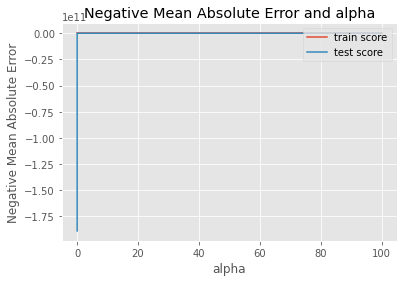

In [97]:
#Plotting the values of alpha w.r.t error term(neg mean absolute error) for training and testing set.
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [98]:
#Printing the best estimator for ridge regression. Also gives us the optimum value of alpha.
model_cv.best_estimator_

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [99]:
#Training a ridge regression model using the best value of alpha
alpha = 0.01
ridge = Ridge(alpha=alpha)

#Fitting the ridge regression model
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-0.13433385,  0.04646405,  0.17161084,  0.05752019, -0.05848098,
       -0.20964974, -0.16500903,  0.06123644, -0.06437332,  0.09181717,
        0.10348303, -0.0638579 , -0.09799989, -0.04601556,  0.12753134,
       -0.04071072, -0.03156156,  0.09684195,  0.15100235,  0.07225914,
        0.21775485,  0.33121477,  0.37429585,  0.43075249,  0.50810535,
        0.61214713,  0.74931094,  0.68520668, -0.07420297, -0.21703751,
       -0.10358385, -0.07327548,  0.05541995,  0.12630958, -0.12144454,
       -0.20827106,  0.10427235, -0.05109133, -0.08961891, -0.23839657,
       -0.04412033,  0.0923124 , -0.04412033, -0.05274519, -0.13466027,
        0.13199799,  0.09417366,  0.07694637,  0.11792732, -0.04307633])

In [100]:
# Checking the mean squared error and MAE
X_test_rfe=X_test_model[col]
print(metrics.mean_squared_error(y_test, ridge.predict(X_test_rfe)))
print(metrics.mean_absolute_error(y_test, ridge.predict(X_test_rfe)))

0.018368440325706177
0.09447911927302838


The mean squared error and the MAE both are low for test data for alpha=0.01

**According to Ridge regression, the optimum value of lambda is 0.01**

**Finding the most significant variables for prediction of house price.**

The most significant variables for house prediction and value of their significance are:

In [101]:
# Making a dataframe with Variables and coefficient

var_and_coeff_df = pd.DataFrame({'Var':X_train_rfe.columns, 'Coeff':ridge.coef_})
var_and_coeff_df = var_and_coeff_df.sort_values(by='Coeff', ascending=False)
var_and_coeff_df.reset_index(drop=True, inplace=True)
var_and_coeff_df.head(20)

Var     Coeff
0          OverallQual_9  0.749311
1         OverallQual_10  0.685207
2          OverallQual_8  0.612147
3          OverallQual_7  0.508105
4          OverallQual_6  0.430752
5          OverallQual_5  0.374296
6          OverallQual_4  0.331215
7          OverallQual_3  0.217755
8              GrLivArea  0.171611
9   Neighborhood_StoneBr  0.151002
10     GarageType_Attchd  0.131998
11  Neighborhood_NridgHt  0.127531
12         OverallCond_9  0.126310
13     GarageType_Detchd  0.117927
14   Exterior1st_BrkFace  0.104272
15  Neighborhood_Crawfor  0.103483
16  Neighborhood_Somerst  0.096842
17    GarageType_Basment  0.094174
18       BsmtExposure_Gd  0.092312
19  Neighborhood_ClearCr  0.091817

**The most significant factors to be considered while predicting house price are:**



1.   Overall Quality of the house.
2.   Living Area above ground.
3.   Neighbourhood: Stone Brooke, Northridge Heights, Crawford, Somerset, Clear Creek.
4.   Garage type: Attached, Detached, Basement.
5.   Exterior covering on house: Brick Face.
6.   walkout or garden level walls: Good.




## **3.3 Lasso Regression**

In [102]:
#Lasso needs to be applied on X_train_model.
print(X_train_model.shape)
X_test_model.head()

(1021, 172)


LotFrontage   LotArea  YearBuilt  YearRemodAdd  Remodelled  MasVnrArea  \
892      0.050470 -0.289682   0.308510     -0.878496   -1.063517   -0.516706   
1105     1.541747  0.707394  -0.766104     -0.486217   -1.063517    1.439412   
413     -0.695169 -0.147984   1.556450      1.720356   -1.063517   -0.516706   
522     -1.014729 -1.175684   0.863150      1.720356   -1.063517   -0.516706   
1036     1.062408  0.874006  -1.216749     -1.123671   -1.063517   -0.138451   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
892     0.506366  -0.379233     0.015464 -0.208840 -0.777614  -0.814406   
1105    1.332125  -0.294835     0.983538  0.929493  1.862300   2.229586   
413    -0.977314   1.096524    -0.106744 -0.314241 -0.777614  -0.892758   
522    -0.084421   0.124743    -0.116329 -0.377482  0.775277   0.353045   
1036    1.309747   0.107863     1.359745  1.245697 -0.777614   0.266858   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
892      -0.831704      4.070224 -0.933625 -0.768610      0.229743   
1105      1.100137     -0.225036  0.840667  1.148548      0.229743   
413      -0.831704     -0.225036 -0.933625 -0.768610     -0.985405   
522      -0.831704     -0.225036  0.840667 -0.768610      0.229743   
1036      1.100137     -0.225036  0.840667 -0.768610     -0.985405   

      KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
892      -0.210432     -0.282851   -0.972826     0.640252   -0.931643   
1105     -0.210432      1.579724    2.202420    -0.673229    0.346455   
413      -0.210432     -0.903710    0.614797     2.165586    0.346455   
522      -0.210432      0.338007    2.202420     1.191067    0.346455   
1036     -0.210432     -0.282851    0.614797    -1.266414    1.624552   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
892    -0.885441    0.970988    -0.684968      -0.389964   -0.11646   
1105    1.103202    0.915734    -0.135398      -0.389964   -0.11646   
413    -0.459304   -0.797129    -0.684968       1.774732   -0.11646   
522    -0.192967   -0.797129    -0.272790       0.209490   -0.11646   
1036    1.990989    1.302510    -0.684968      -0.389964   -0.11646   

      ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  MSSubClass_30  \
892     -0.256313 -0.067534 -0.064422 -1.497123  1.366489              0   
1105    -0.256313 -0.067534 -0.064422 -0.787747 -1.636708              0   
413     -0.256313 -0.067534 -0.064422 -1.142435 -1.636708              1   
522     -0.256313 -0.067534 -0.064422  1.340381  1.366489              0   
1036    -0.256313 -0.067534 -0.064422  0.985693 -0.885909              0   

      MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
892               0              0              0              0   
1105              0              0              0              1   
413               0              0              0              0   
522               0              0              1              0   
1036              0              0              0              0   

      MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
892               0              0              0              0   
1105              0              0              0              0   
413               0              0              0              0   
522               0              0              0              0   
1036              0              0              0              0   

      MSSubClass_90  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
892               0               0               0               0   
1105              0               0               0               0   
413               0               0               0               0   
522               0               0               0               0   
1036              0               0               0               0   

      MSSubClass_190  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
892                

In [103]:
#Instatiating lasso class

lasso = Lasso()

# Grid cross validation.

#KFold shuffling
folds = KFold(n_splits=5,shuffle=True, random_state=42)

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params,     #Keeping the parameters same as in Ridge Regression
                        scoring= 'neg_mean_absolute_error', #Evaluation metric: Negative mean square error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)     

#Fitting a Lasso model with mutiple parameters using Grid Search cross validation        
model_cv.fit(X_train_model, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [104]:
#Creating a dataframe after creating a ridge model and analyzing param_alpha, mean_train_score, mean_test_score, rank_test_score

lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
1        0.001         -0.078653        -0.090338                1
0            0         -0.070461        -0.093924                2
2         0.01         -0.105622        -0.109075                3
3         0.05         -0.125148        -0.127894                4
4          0.1         -0.160806        -0.162091                5
5          0.2         -0.248611        -0.250141                6
21          20         -0.306514        -0.306605                7
20          10         -0.306514        -0.306605                7
19           9         -0.306514        -0.306605                7
18           8         -0.306514        -0.306605                7
17           7         -0.306514        -0.306605                7
16           6         -0.306514        -0.306605                7
15           5         -0.306514        -0.306605                7
14           4         -0.306514        -0.306605                7
11           1         -0.306514        -0.306605                7
12           2         -0.306514        -0.306605                7
22          50         -0.306514        -0.306605                7
10         0.9         -0.306514        -0.306605                7
9          0.8         -0.306514        -0.306605                7
8          0.7         -0.306514        -0.306605                7
7          0.6         -0.306514        -0.306605                7
6          0.5         -0.306514        -0.306605                7
13           3         -0.306514        -0.306605                7
23         100         -0.306514        -0.306605                7

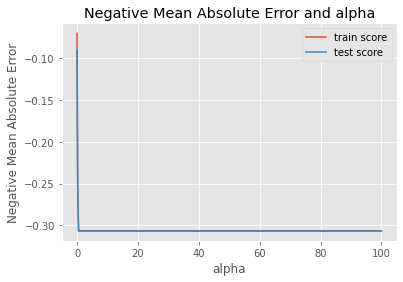

In [105]:
#Plotting the values of alpha w.r.t error term(neg mean absolute error) for training and testing set.

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [106]:
#Printing the best estimator for Lasso regression. Also gives us the optimum value of alpha.
model_cv.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Since the best estimater alpha is 0.001, changing the params

In [107]:
# Alpha values that will be passed as parameters for Lasso 
params = {'alpha': [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0008, 0.001, 0.002, 0.005, 0.008, 0.01, 0.02]}

In [108]:
#Instatiating Lasso class

lasso = Lasso()

# Grid cross validation.

#KFold shuffling
folds = KFold(n_splits=5,shuffle=True, random_state=42)

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params,  #Keeping the parameters same as in Ridge Regression
                        scoring= 'neg_mean_absolute_error',  #Evaluation metric: Negative mean square error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)   

#Fitting a Lasso model with mutiple parameters using Grid Search cross validation         
model_cv.fit(X_train_model, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0008, 0.001, 0.002, 0.005, 0.008,
                                   0.01, 0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [109]:
#Creating a dataframe after creating a ridge model and analyzing param_alpha, mean_train_score, mean_test_score, rank_test_score
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4       0.0004         -0.074213        -0.087575                1
3       0.0003         -0.073355        -0.087734                2
5       0.0005         -0.075023        -0.087864                3
6       0.0006         -0.075709        -0.088171                4
2       0.0002         -0.072643        -0.088449                5
7       0.0008         -0.077110        -0.089122                6
1       0.0001         -0.071762        -0.089767                7
8        0.001         -0.078653        -0.090338                8
0            0         -0.070461        -0.093924                9
9        0.002         -0.086678        -0.096887               10
10       0.005         -0.100058        -0.105535               11
11       0.008         -0.104247        -0.108181               12
12        0.01         -0.105622        -0.109075               13
13        0.02         -0.109076        -0.111736               14

In [110]:
#Printing the best estimator for Lasso regression. Also gives us the optimum value of alpha.
model_cv.best_estimator_

Lasso(alpha=0.0004, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

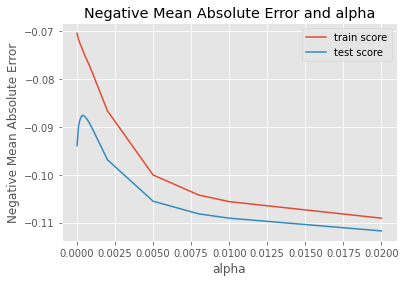

In [111]:
#Plotting the values of alpha w.r.t error term(neg mean absolute error) for training and testing set.

lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

The MAE of test and train datasets in GridSearch Cross validation is close to each other which shows it's a lowering down the bias and the variance.

In [112]:
# Alpha values that will be passed as parameters for Lasso
params = {'alpha': [0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.00040, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045,
                    0.00046, 0.00047, 0.00048, 0.00049, 0.00050]}

#Instatiating Lasso class
lasso = Lasso()

# Grid cross validation.

#KFold shuffling
folds = KFold(n_splits=5,shuffle=True, random_state=42)

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params,     #Keeping the parameters same as in Ridge Regression
                        scoring= 'neg_mean_absolute_error',    #Evaluation metric: Negative mean square error
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)     

#Fitting a Lasso model with mutiple parameters using Grid Search cross validation        
model_cv.fit(X_train_model, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.8s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.00035, 0.00036, 0.00037, 0.00038, 0.00039,
                                   0.0004, 0.00041, 0.00042, 0.00043, 0.00044,
                                   0.00045, 0.00046, 0.00047, 0.00048, 0.00049,
                                   0.0005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [113]:
#Creating a dataframe after creating a ridge model and analyzing param_alpha, mean_train_score, mean_test_score, rank_test_score
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

param_alpha  mean_train_score  mean_test_score  rank_test_score
4      0.00039         -0.074118        -0.087554                1
3      0.00038         -0.074030        -0.087555                2
2      0.00037         -0.073945        -0.087562                3
5       0.0004         -0.074213        -0.087575                4
1      0.00036         -0.073861        -0.087576                5
6      0.00041         -0.074301        -0.087597                6
0      0.00035         -0.073777        -0.087599                7
7      0.00042         -0.074389        -0.087623                8
8      0.00043         -0.074475        -0.087644                9
9      0.00044         -0.074557        -0.087672               10
10     0.00045         -0.074634        -0.087705               11
11     0.00046         -0.074708        -0.087730               12
12     0.00047         -0.074788        -0.087757               13
13     0.00048         -0.074869        -0.087791               14
14     0.00049         -0.074946        -0.087828               15
15      0.0005         -0.075023        -0.087864               16

In [114]:
#Printing the best estimator for Lasso regression. Also gives us the optimum value of alpha.
model_cv.best_estimator_

Lasso(alpha=0.00039, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

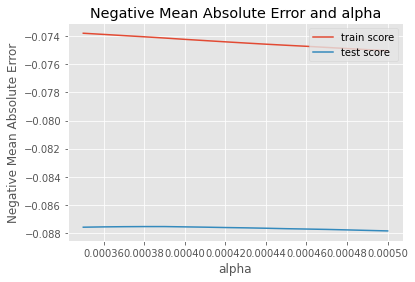

In [115]:
#Plotting the values of alpha w.r.t error term(neg mean absolute error) for training and testing set.
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('float64')

plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

The MAE of Train and test datasets in GridSearch Cross validation is very low which makes the model a more generalised one: Low bias low variance.

In [116]:
# check the coefficient values with lambda = 0.00039

alpha = 0.00039

lasso = Lasso(alpha=alpha)

#Fitting the data X_train_model and y_train into a lasso object of class Lasso() and hyper-parameter alpha=0.00039
lasso.fit(X_train_model, y_train) 
lasso.coef_

array([ 7.71000348e-03,  1.84096134e-02, -8.69983236e-02, -2.55788755e-02,
        6.86725273e-03,  1.68932304e-03,  3.82550976e-02,  1.44301869e-02,
        1.46879899e-02, -0.00000000e+00, -1.38692807e-02,  1.57536145e-01,
        1.42718402e-02,  7.12240133e-04,  8.29043397e-03,  1.21189674e-02,
        1.28025131e-03, -2.39004254e-02, -0.00000000e+00,  1.66011234e-02,
       -1.72234185e-03,  2.95078594e-02,  1.51579859e-03,  8.43463289e-03,
       -1.88947138e-04,  8.22465443e-03,  3.62539709e-03,  1.46541364e-02,
       -4.77815446e-03, -4.78334963e-03,  2.43970435e-03,  1.37955787e-03,
       -6.59233050e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.37931993e-02,  2.00365565e-02,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -2.08435218e-02, -1.08121591e-01,
       -0.00000000e+00,  0.00000000e+00,  2.24909799e-02, -0.00000000e+00,
       -8.58839836e-04, -0.00000000e+00, -0.00000000e+00,  2.96189873e-02,
        5.39675995e-02,  

In [117]:
# Check the mean squared error
print(metrics.mean_squared_error(y_train, lasso.predict(X_train_model)))
print(metrics.mean_squared_error(y_test, lasso.predict(X_test_model)))

0.011560947846272464
0.016950688756640242


The MSE of the train and test data is too low.

**According to Lasso regression, the optimum value of lambda is 0.00039. Finding the most significant variables for prediction of house price**

The most significant variables for house prediction and value of their significance are:

In [118]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_var_and_coeff_df = pd.DataFrame({'Variables':X_train_model.columns, 'Coeff':lasso.coef_.round(4)})
lasso_var_and_coeff_df = lasso_var_and_coeff_df[lasso_var_and_coeff_df['Coeff'] != 0.00]
lasso_var_and_coeff_df = lasso_var_and_coeff_df.sort_values(by='Coeff', ascending=False)
lasso_var_and_coeff_df.reset_index(drop=True, inplace=True)
lasso_var_and_coeff_df.head(20)

Variables   Coeff
0          OverallQual_9  0.1606
1              GrLivArea  0.1575
2          OverallCond_9  0.1566
3   Neighborhood_StoneBr  0.1186
4          OverallCond_7  0.1075
5   Neighborhood_Crawfor  0.0972
6          OverallCond_8  0.0959
7          OverallQual_8  0.0917
8    Exterior1st_BrkFace  0.0877
9   Neighborhood_Somerst  0.0787
10  Neighborhood_NridgHt  0.0716
11         OverallCond_6  0.0598
12  Neighborhood_ClearCr  0.0540
13       BsmtExposure_Gd  0.0517
14        OverallQual_10  0.0442
15         OverallQual_7  0.0437
16            BsmtFinSF1  0.0383
17      Foundation_PConc  0.0349
18     GarageType_Attchd  0.0311
19     GarageType_Detchd  0.0297

In [119]:
lasso_var_and_coeff_df = lasso_var_and_coeff_df.sort_values(by='Coeff', ascending=True)

In [120]:
lasso_var_and_coeff_df.head(20)

Variables   Coeff
108         OverallCond_3 -0.1769
107         OverallQual_3 -0.1519
106  Neighborhood_MeadowV -0.1260
105        MSSubClass_160 -0.1081
104             YearBuilt -0.0870
103          ExterQual_Fa -0.0719
102         MSSubClass_30 -0.0659
101         GarageType_NA -0.0478
100         OverallQual_4 -0.0381
99    Neighborhood_IDOTRR -0.0361
98           HeatingQC_Fa -0.0360
97         KitchenQual_TA -0.0353
96   Neighborhood_Edwards -0.0336
95            BsmtQual_Gd -0.0326
94            BsmtQual_TA -0.0321
93         KitchenQual_Fa -0.0311
92    Neighborhood_NWAmes -0.0296
91   Neighborhood_OldTown -0.0288
90         KitchenQual_Gd -0.0262
89           YearRemodAdd -0.0256

**The most significant factors to be considered while predicting house price are:**

1.   Overall Quality(Excellent, Very Good, Very Excellent, Good) and Overall condition(Excellent, Good, Very Good, Over average) of the property affects the house price positively
2.   Overall Quality(Fair, Poor) and Overall condition(Fair) of the property affects the house price positively
3.   Neighbourhoods like Stone Brook, Northridge Heights, Crawford, Somerset affects the house price positively while Meadow Village, Iowa DOT and Rail Road, Edwards, Northwest Ames, Old towns affects the house price negatively.
4.   Exterior covering on house (brick face) and Good basement exposure affects positively to house price.

# **4 Conclusion**

*   **The optimal lambda value in case of Ridge is 0.01.** The most significant variables for house price prediction according to Ridge regression:
  1.   Overall Quality of the house.
  2.   Living Area above ground.
  3.   Neighbourhood: Stone Brooke, Northridge Heights, Crawford, 
Somerset, Clear Creek.
  4.   Garage type: Attached, Detached, Basement.
  5.   Exterior covering on house: Brick Face.
  6.   Walkout or garden level walls: Good.


In [121]:
#Significance magnitude of the variables after ridge regression
var_and_coeff_df.head(20)

Var     Coeff
0          OverallQual_9  0.749311
1         OverallQual_10  0.685207
2          OverallQual_8  0.612147
3          OverallQual_7  0.508105
4          OverallQual_6  0.430752
5          OverallQual_5  0.374296
6          OverallQual_4  0.331215
7          OverallQual_3  0.217755
8              GrLivArea  0.171611
9   Neighborhood_StoneBr  0.151002
10     GarageType_Attchd  0.131998
11  Neighborhood_NridgHt  0.127531
12         OverallCond_9  0.126310
13     GarageType_Detchd  0.117927
14   Exterior1st_BrkFace  0.104272
15  Neighborhood_Crawfor  0.103483
16  Neighborhood_Somerst  0.096842
17    GarageType_Basment  0.094174
18       BsmtExposure_Gd  0.092312
19  Neighborhood_ClearCr  0.091817

*   **The optimal lambda value in case of Ridge is 0.00039.** The most significant variables for house price prediction according to Lasso regression:
  1.   Overall Quality(Excellent, Very Good, Very Excellent, Good) and Overall condition(Excellent, Good, Very Good, Over average) of the property affects the house price positively
  2.   Overall Quality(Fair, Poor) and Overall condition(Fair) of the property affects the house price positively
  3.   Neighbourhoods like Stone Brook, Northridge Heights, Crawford, Somerset affects the house price positively while Meadow Village, Iowa DOT and Rail Road, Edwards, Northwest Ames, Old towns affects the house price negatively.
  4.   Exterior covering on house (brick face) and Good basement exposure affects positively to house price.

In [122]:
#Negative Significance magnitude of the variables after lasso regression
lasso_var_and_coeff_df.head(20)

Variables   Coeff
108         OverallCond_3 -0.1769
107         OverallQual_3 -0.1519
106  Neighborhood_MeadowV -0.1260
105        MSSubClass_160 -0.1081
104             YearBuilt -0.0870
103          ExterQual_Fa -0.0719
102         MSSubClass_30 -0.0659
101         GarageType_NA -0.0478
100         OverallQual_4 -0.0381
99    Neighborhood_IDOTRR -0.0361
98           HeatingQC_Fa -0.0360
97         KitchenQual_TA -0.0353
96   Neighborhood_Edwards -0.0336
95            BsmtQual_Gd -0.0326
94            BsmtQual_TA -0.0321
93         KitchenQual_Fa -0.0311
92    Neighborhood_NWAmes -0.0296
91   Neighborhood_OldTown -0.0288
90         KitchenQual_Gd -0.0262
89           YearRemodAdd -0.0256

In [123]:
#Positive Significance magnitude of the variables after lasso regression
lasso_var_and_coeff_df.sort_values(by='Coeff', ascending=False).head(20)

Variables   Coeff
0          OverallQual_9  0.1606
1              GrLivArea  0.1575
2          OverallCond_9  0.1566
3   Neighborhood_StoneBr  0.1186
4          OverallCond_7  0.1075
5   Neighborhood_Crawfor  0.0972
6          OverallCond_8  0.0959
7          OverallQual_8  0.0917
8    Exterior1st_BrkFace  0.0877
9   Neighborhood_Somerst  0.0787
10  Neighborhood_NridgHt  0.0716
11         OverallCond_6  0.0598
12  Neighborhood_ClearCr  0.0540
13       BsmtExposure_Gd  0.0517
14        OverallQual_10  0.0442
15         OverallQual_7  0.0437
16            BsmtFinSF1  0.0383
17      Foundation_PConc  0.0349
18     GarageType_Attchd  0.0311
19     GarageType_Detchd  0.0297

# **Assignment Part-2. Coding solution for subjective questions**

In [124]:
alpha = 0.02
ridge = Ridge(alpha=alpha)

#Fitting the ridge regression model
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([-0.1344798 ,  0.04648692,  0.1717764 ,  0.0576726 , -0.05837464,
       -0.2096222 , -0.16461929,  0.06119168, -0.06419196,  0.09174029,
        0.10349167, -0.06352067, -0.09815993, -0.04601042,  0.12765832,
       -0.040541  , -0.0315693 ,  0.09684922,  0.15095332,  0.05205797,
        0.19788679,  0.31123983,  0.35406802,  0.41036749,  0.48749546,
        0.59139103,  0.72825766,  0.66371175, -0.07380852, -0.21791245,
       -0.10347902, -0.07316218,  0.05558148,  0.12650993, -0.11906838,
       -0.20586457,  0.10436589, -0.05085705, -0.08851516, -0.23774027,
       -0.04449758,  0.09212339, -0.04449758, -0.05316718, -0.13342699,
        0.13181296,  0.09394771,  0.07665923,  0.1177786 , -0.04393423])

In [125]:
X_test_rfe=X_test_model[col]
print(metrics.mean_squared_error(y_test, ridge.predict(X_test_rfe)))
print(metrics.mean_absolute_error(y_test, ridge.predict(X_test_rfe)))

0.018379655016179913
0.09450714333938318


In [126]:
var_and_coeff_df = pd.DataFrame({'Var':X_train_rfe.columns, 'Coeff':ridge.coef_})
var_and_coeff_df = var_and_coeff_df.sort_values(by='Coeff', ascending=False)
var_and_coeff_df.reset_index(drop=True, inplace=True)
var_and_coeff_df.head(20)

Var     Coeff
0          OverallQual_9  0.728258
1         OverallQual_10  0.663712
2          OverallQual_8  0.591391
3          OverallQual_7  0.487495
4          OverallQual_6  0.410367
5          OverallQual_5  0.354068
6          OverallQual_4  0.311240
7          OverallQual_3  0.197887
8              GrLivArea  0.171776
9   Neighborhood_StoneBr  0.150953
10     GarageType_Attchd  0.131813
11  Neighborhood_NridgHt  0.127658
12         OverallCond_9  0.126510
13     GarageType_Detchd  0.117779
14   Exterior1st_BrkFace  0.104366
15  Neighborhood_Crawfor  0.103492
16  Neighborhood_Somerst  0.096849
17    GarageType_Basment  0.093948
18       BsmtExposure_Gd  0.092123
19  Neighborhood_ClearCr  0.091740